Comprehensive Autoimmune Disorder Dataset - Exploratory Data Analysis

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/abdullahragheb/all-autoimmune-disorder-10k/data

In [3]:
#libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)  # Wyświetla wszystkie kolumny


Data aquisition form database

In [4]:
# connection to database
db_name = '../database/db_autoimmune_disorders_new.db'
conn = sqlite3.connect(db_name)

# import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)

# close connection
conn.close()

Checking data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  object 
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12510 non-null  object 
 6   Hemoglobin                            12510 non-null  object 
 7   Hematocrit                            12510 non-null  object 
 8   MCV                                   12510 non-null  object 
 9   MCH                                   12510 non-null  object 
 10  MCHC                                  12510 non-null  float64
 11  RDW            

In [6]:
# drop from df diseases group column Thyroid and Endocrine Diseases, Vascular Diseases, Kidney and Urinary Diseases, Miscellaneous
#df = df.drop(df[df['Diseases_group'].isin(['Kidney and Urinary Diseases','Miscellaneous','Thyroid and Endocrine Diseases','Vascular Diseases'])].index)

First look at the dataset to check if data types are correct

In [7]:
df.head() 

Patient_ID Age  Gender                                        Diagnosis  \
0           1  65  Female                               Linear IgA disease   
1           2  61    Male                                  Dermatomyositis   
2           3  42    Male                                Ord's thyroiditis   
3           4  45  Female                           Restless legs syndrome   
4           5  78  Female  Autoimmune polyendocrine syndrome type 2 (APS2)   

   Sickness_Duration_Months RBC_Count Hemoglobin Hematocrit    MCV    MCH  \
0                        26      3.54      13.18      44.35  99.85   31.8   
1                       106      4.97      14.73      42.39  94.86  29.94   
2                         6      3.91      13.66      42.41  88.26  29.43   
3                        11      4.57      14.96       40.1  85.95  27.42   
4                        30      4.88      11.21      37.58  93.16  29.87   

    MCHC    RDW Reticulocyte_Count WBC_Count  Neutrophils  Lymphocytes  \
0  33.12  12.52               2.08      8278        72.25        19.80   
1  31.07  15.15               1.21      8592        56.73        42.68   
2  35.61  15.52               2.68      8719        50.92        31.21   
3  33.93  12.14               1.79      7698        41.20        33.60   
4  31.29  15.65               1.42      9755        45.82        42.57   

   Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  Esbach  \
0       9.26         4.02       1.08     429117   8.08    1    1.50   
1       2.66         1.67       1.16     487184   8.92    1    1.76   
2       6.96         4.32       1.07     499962   7.70    1    2.49   
3       6.54         3.12       0.72     129793  10.95    1    0.75   
4       3.05         4.60       1.40     467390  10.51    1    0.76   

   MBL_Level  ESR    C3    C4   CRP  Anti-dsDNA  Anti-Sm  Rheumatoid factor  \
0       1.81   40  1.32  0.49  3.10         1.0      1.0                0.0   
1       1.08   23  0.40  0.17  2.73         0.0      0.0                1.0   
2       1.42   44  0.95  0.26  1.02         1.0      0.0                1.0   
3       1.05   25  1.06  0.26  5.45         0.0      1.0                0.0   
4       1.14   42  0.73  0.25  1.05         0.0      1.0                0.0   

   ACPA  Anti-TPO  Anti-Tg  Anti-SMA  Low-grade fever  \
0   1.0       0.0      1.0       1.0                0   
1   1.0       0.0      1.0       0.0                1   
2   1.0       1.0      1.0       1.0                0   
3   1.0       1.0      1.0       0.0                1   
4   1.0       0.0      0.0       1.0                0   

   Fatigue or chronic tiredness  Dizziness  Weight loss  \
0                             1          1            0   
1                             0          0            1   
2                             1          1            0   
3                             0          1            1   
4                             1          1            1   

   Rashes and skin lesions  Stiffness in the joints  \
0                        0                        0   
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        0                        1   

   Brittle hair or hair loss  Dry eyes and/or mouth  General unwell feeling  \
0                          0                      0                       1   
1                          1                      0                       0   
2                          0                      0                       0   
3                          1                      1                       1   
4                          0                      0                       1   

   Joint pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           1           0                           0          0         0   
1           1           0                           0          0

In [8]:
df.tail()

Patient_ID Age  Gender Diagnosis  Sickness_Duration_Months RBC_Count  \
12505       12506  43            Normal                         0      5.09   
12506       12507      Female    Normal                         0      5.09   
12507       12508  28    Male    Normal                         0      5.09   
12508       12509      Female    Normal                         0      5.09   
12509       12510  78    Male    Normal                         0      5.09   

      Hemoglobin Hematocrit    MCV    MCH   MCHC    RDW Reticulocyte_Count  \
12505      16.65      46.63  81.99         35.77  13.61               1.39   
12506      16.65      46.63  81.99         35.77  13.61                      
12507      16.65      46.63         27.96  35.77                      1.39   
12508      16.65      46.63                35.77                      1.39   
12509      16.65      46.63  81.99         35.77  13.61                      

      WBC_Count  Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  \
12505                  47.08        30.12       5.15         1.18       0.93   
12506     10383        47.08        30.12       5.15         1.18       0.93   
12507     10383        47.08        30.12       5.15         1.18       0.93   
12508     10383        47.08        30.12       5.15         1.18       0.93   
12509     10383        47.08        30.12       5.15         1.18       0.93   

       PLT_Count   MPV  ANA  Esbach  MBL_Level  ESR    C3    C4   CRP  \
12505     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12506     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12507     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12508     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   
12509     193520  9.04    0    1.27        0.4    0  0.89  0.29  0.49   

       Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  Anti-Tg  \
12505         NaN      NaN                NaN   NaN       NaN      NaN   
12506         NaN      NaN                NaN   NaN       NaN      NaN   
12507         NaN      NaN                NaN   NaN       NaN      NaN   
12508         NaN      NaN                NaN   NaN       NaN      NaN   
12509         NaN      NaN                NaN   NaN       NaN      NaN   

       Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  Dizziness  \
12505       NaN                0                             0          0   
12506       NaN                0                             0          0   
12507       NaN                0                             0          0   
12508       NaN                0                             0          0   
12509       NaN                0                             0          0   

       Weight loss  Rashes and skin lesions  Stiffness in the joints  \
12505            0                        0                        0   
12506            0                        0                        0   
12507            0                        0                        0   
12508            0                        0                        0   
12509            0                        0                        0   

       Brittle hair or hair loss  Dry eyes and/or mouth  \
12505                          0                      0   
12506                          0                      0   
12507                          0                      0   
12508                          0                      0   
12509                          0                      0   

       General unwell feeling  Joint pain  Anti_dsDNA  \
12505                       0           0           0   
12506                       0           0           0   
12507                       0           0           0   
12508                       0           0           0   
12509                       0           0           0   

       Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  ASCA  Anti_Ro_SSA  \
12505                      

In [9]:
# checking columns with object type
for el in df.select_dtypes(include=['object']).columns.tolist():
    print(el)

Age
Gender
Diagnosis
RBC_Count
Hemoglobin
Hematocrit
MCV
MCH
RDW
Reticulocyte_Count
WBC_Count
Diseases_eng
Diseases_pl
Diseases_group
Description_eng
Description_pl


As we can see some of these columns shouldn't be object - Hemoglobin, Hematocrit, MCV, MCH, RDW, RBC_Count, Reticulocyte_Count should be float; Age, WBC_Count, should be int.
Additionaly Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA are float type and they should be int as well.

In [10]:
# changing type for float variables
float_list = ['Age','Hemoglobin','Hematocrit','MCV','MCH','RDW','RBC_Count','Reticulocyte_Count','WBC_Count']

for col in float_list:
    df[col] = np.where(df[col]=='', np.nan, df[col])
    df[col] = df[col].apply(float)
    
# replacing NaN values with 0 for Age, WBC_Count, Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA
df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']] = np.where(df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']].isna(), 0, df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']])

# changing type for Age, WBC_Count, Anti-dsDNA, Anti-Sm, Rheumatoid factor, ACPA, Anti-TPO, Anti-Tg, Anti-SMA into int64
df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']] = df[['Age','WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']].astype(np.int64)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  int64  
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12509 non-null  float64
 6   Hemoglobin                            12508 non-null  float64
 7   Hematocrit                            12508 non-null  float64
 8   MCV                                   12507 non-null  float64
 9   MCH                                   12506 non-null  float64
 10  MCHC                                  12510 non-null  float64
 11  RDW            

Missing data analysis

In [12]:
# looking at the NaN values and assigning all of them to their variables
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 1,
 'Hemoglobin': 2,
 'Hematocrit': 2,
 'MCV': 3,
 'MCH': 4,
 'MCHC': 0,
 'RDW': 4,
 'Reticulocyte_Count': 5,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'Anti-dsDNA': 0,
 'Anti-Sm': 0,
 'Rheumatoid factor': 0,
 'ACPA': 0,
 'Anti-TPO': 0,
 'Anti-Tg': 0,
 'Anti-SMA': 0,
 'Low-grade fever': 0,
 'Fatigue or chronic tiredness': 0,
 'Dizziness': 0,
 'Weight loss': 0,
 'Rashes and skin lesions': 0,
 'Stiffness in the joints': 0,
 'Brittle hair or hair loss': 0,
 'Dry eyes and/or mouth': 0,
 'General unwell feeling': 0,
 'Joint pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 

In [13]:
# defining which columns have significant (above 100 observations) number of NaNs 
nans_above_100 = []

for key in nan_dict.keys():
    if nan_dict[key] > 100:
        nans_above_100.append(key)
    else:
        continue

print(nans_above_100)

# other variables
nans_below_100 = []

for key in nan_dict.keys():
    if key not in nans_above_100:
        nans_below_100.append(key)
    else:
        continue

print(nans_below_100)

[]
['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA', 'Low-grade fever', 'Fatigue or chronic tiredness', 'Dizziness', 'Weight loss', 'Rashes and skin lesions', 'Stiffness in the joints', 'Brittle hair or hair loss', 'Dry eyes and/or mouth', 'General unwell feeling', 'Joint pain', 'Anti_dsDNA', 'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA', 'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP', 'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP', 'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_desmoglein_1', 'EMA', 'Anti_type_VII_collagen', 'C1_inhibitor', 'Anti_T

In [14]:
# we can drop without consequences nan observations for column in nans_below_100
df = df[nans_below_100].dropna()

In [15]:
# filling NaNs with 0 for nans_above_100
df = df.fillna(0)

In [16]:
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 0,
 'Hemoglobin': 0,
 'Hematocrit': 0,
 'MCV': 0,
 'MCH': 0,
 'MCHC': 0,
 'RDW': 0,
 'Reticulocyte_Count': 0,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'Anti-dsDNA': 0,
 'Anti-Sm': 0,
 'Rheumatoid factor': 0,
 'ACPA': 0,
 'Anti-TPO': 0,
 'Anti-Tg': 0,
 'Anti-SMA': 0,
 'Low-grade fever': 0,
 'Fatigue or chronic tiredness': 0,
 'Dizziness': 0,
 'Weight loss': 0,
 'Rashes and skin lesions': 0,
 'Stiffness in the joints': 0,
 'Brittle hair or hair loss': 0,
 'Dry eyes and/or mouth': 0,
 'General unwell feeling': 0,
 'Joint pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_tTG': 0,
 'DGP': 0,
 

Duplicates analysis - there is no duplicated rows (patients) in the dataset

In [17]:
df.duplicated().sum()

0

Outlier detection

In [18]:
# Z-score for float columns

float_columns = df.select_dtypes(include=['float64']).columns

results = {}

for col in float_columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers_count = (z_scores > 3).sum()
    if outliers_count >= 0:
        results[col] = outliers_count

for col, count in results.items():
    print(f"Column: {col} - Number of outliers: {count}")

Column: RBC_Count - Number of outliers: 0
Column: Hemoglobin - Number of outliers: 0
Column: Hematocrit - Number of outliers: 0
Column: MCV - Number of outliers: 0
Column: MCH - Number of outliers: 0
Column: MCHC - Number of outliers: 0
Column: RDW - Number of outliers: 0
Column: Reticulocyte_Count - Number of outliers: 0
Column: Neutrophils - Number of outliers: 0
Column: Lymphocytes - Number of outliers: 0
Column: Monocytes - Number of outliers: 0
Column: Eosinophils - Number of outliers: 0
Column: Basophils - Number of outliers: 0
Column: MPV - Number of outliers: 0
Column: Esbach - Number of outliers: 0
Column: MBL_Level - Number of outliers: 0
Column: C3 - Number of outliers: 0
Column: C4 - Number of outliers: 0
Column: CRP - Number of outliers: 0


There are no outliers in float type columns

In [19]:
# Z-score for int columns with more than two values (not a binary columns)

int_columns = ['PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR']

results = {}

for col in int_columns:
  col_data = df[col]
  z_scores = np.abs(stats.zscore(col_data))
  outliers_count = (z_scores > 3).sum()
  if outliers_count >= 0:
    results[col] = outliers_count

for col, count in results.items():
  print(f"Column: {col} - Number od outliers: {count}")

Column: PLT_Count - Number od outliers: 0
Column: Age - Number od outliers: 0
Column: Sickness_Duration_Months - Number od outliers: 0
Column: WBC_Count - Number od outliers: 0
Column: ESR - Number od outliers: 0


There are no outliers in int type columns with more then two values

To check outliers and/or error data values for binary columns we can create frequency tables with value counts, percentages and mode value.

In [20]:
df_drop = df.drop(['Patient_ID', 'PLT_Count', 'Age', 'Sickness_Duration_Months', 'WBC_Count', 'ESR', 'Diseases_ID'], axis=1)

binary_columns = df_drop.select_dtypes(include=['int64']).columns

categorical_stats = {} 

for col in binary_columns:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    mode = df[col].mode()[0]
    
    categorical_stats[col] = pd.DataFrame({
        'Count': value_counts,
        'Percentage': round(percentages,2),
        'Mode': [mode] * len(value_counts)
    })

for var, stats in categorical_stats.items():
    print(f"Statistics for {var}:")
    print(stats)
    print("\n")

Statistics for ANA:
     Count  Percentage  Mode
ANA                         
1     7119       56.96     1
0     5380       43.04     1


Statistics for Anti-dsDNA:
            Count  Percentage  Mode
Anti-dsDNA                         
0            7475        59.8     0
1            5024        40.2     0


Statistics for Anti-Sm:
         Count  Percentage  Mode
Anti-Sm                         
0         7511       60.09     0
1         4988       39.91     0


Statistics for Rheumatoid factor:
                   Count  Percentage  Mode
Rheumatoid factor                         
0                   7581       60.65     0
1                   4918       39.35     0


Statistics for ACPA:
      Count  Percentage  Mode
ACPA                         
0      7499        60.0     0
1      5000        40.0     0


Statistics for Anti-TPO:
          Count  Percentage  Mode
Anti-TPO                         
0          7602       60.82     0
1          4897       39.18     0


Statistics for An

There are no outliers and error data values in binary columns. However, some binary variables exhibit a significant imbalance in the frequency of their categories (very low variance) and they should be removed from the dataset.

Creating diseases group id - this is our target (label) column and it's object type

In [21]:
df['Patient_ID'].duplicated().sum()

0

In [22]:
# unique values for diagnosis and their id 
diagnosis_dictionary = df[['Diseases_group']].drop_duplicates().reset_index(drop=True)
diagnosis_dictionary['Diseases_group_id'] = diagnosis_dictionary['Diseases_group'].astype('category').cat.codes
diagnosis_dictionary

Diseases_group  Diseases_group_id
0            Skin and Mucosal Diseases                  7
1             Musculoskeletal Diseases                  4
2       Thyroid and Endocrine Diseases                  8
3                Neurological Diseases                  5
4               Immune System Diseases                  1
5                        Miscellaneous                  3
6                    Vascular Diseases                  9
7          Kidney and Urinary Diseases                  2
8  Gastrointestinal and Liver Diseases                  0
9                               Normal                  6

In [23]:
# count values for each Diseases_group in oue dataset
dis_group_counts = np.unique(df['Diseases_group'], return_counts=True)

print(f'We have {len(dis_group_counts[0])} groups of autoimmune diseases in our dataset\n')

for el, count in zip(dis_group_counts[0],dis_group_counts[1]):
    print(f'{el}: {count}')

We have 10 groups of autoimmune diseases in our dataset

Gastrointestinal and Liver Diseases: 485
Immune System Diseases: 677
Kidney and Urinary Diseases: 506
Miscellaneous: 1171
Musculoskeletal Diseases: 752
Neurological Diseases: 2206
Normal: 2499
Skin and Mucosal Diseases: 1649
Thyroid and Endocrine Diseases: 1222
Vascular Diseases: 1332


In [24]:
# columns to drop
columns_to_drop = ['Patient_ID','Diseases_eng','Diagnosis','Diseases_pl','Diseases_ID','Description_eng','Description_pl','Recommendation']

# dropping above columns
df = df.drop(columns=columns_to_drop, errors='ignore', axis=1)

Numerical columns analysis

In [25]:
# numerical variables in our dataset
numeric_var = [el for el in df.select_dtypes(include=['float64','int64']).columns if el in nans_below_100]
numeric_var

['Age',
 'Sickness_Duration_Months',
 'RBC_Count',
 'Hemoglobin',
 'Hematocrit',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'Reticulocyte_Count',
 'WBC_Count',
 'Neutrophils',
 'Lymphocytes',
 'Monocytes',
 'Eosinophils',
 'Basophils',
 'PLT_Count',
 'MPV',
 'ANA',
 'Esbach',
 'MBL_Level',
 'ESR',
 'C3',
 'C4',
 'CRP',
 'Anti-dsDNA',
 'Anti-Sm',
 'Rheumatoid factor',
 'ACPA',
 'Anti-TPO',
 'Anti-Tg',
 'Anti-SMA',
 'Low-grade fever',
 'Fatigue or chronic tiredness',
 'Dizziness',
 'Weight loss',
 'Rashes and skin lesions',
 'Stiffness in the joints',
 'Brittle hair or hair loss',
 'Dry eyes and/or mouth',
 'General unwell feeling',
 'Joint pain',
 'Anti_dsDNA',
 'Anti_enterocyte_antibodies',
 'anti_LKM1',
 'Anti_RNP',
 'ASCA',
 'Anti_Ro_SSA',
 'Anti_CBir1',
 'Anti_BP230',
 'Anti_tTG',
 'DGP',
 'Anti_BP180',
 'ASMA',
 'Anti_IF',
 'IgG_IgE_receptor',
 'Anti_SRP',
 'Anti_desmoglein_3',
 'Anti_La_SSB',
 'Anti_Jo1',
 'ANCA',
 'anti_centromere',
 'Anti_desmoglein_1',
 'EMA',
 'Anti_type_VII_collagen',

In [26]:
for var in list(['Age','Sickness_Duration_Months','WBC_Count','PLT_Count','ESR']):
    df[var] = df[var].apply(float)

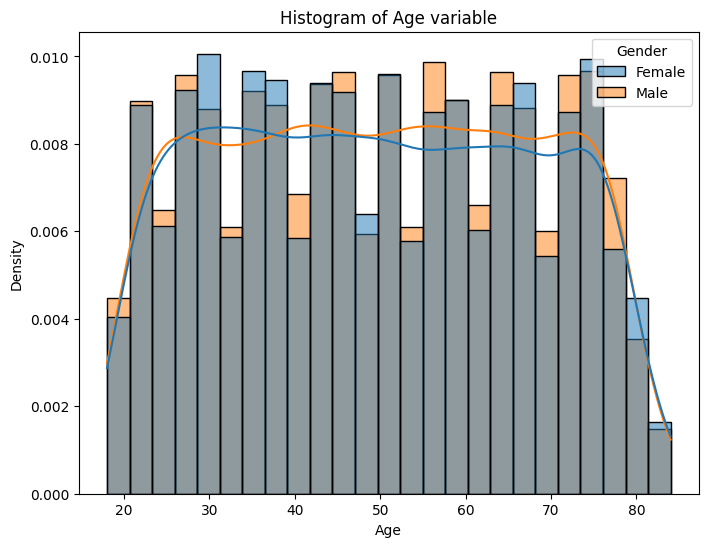

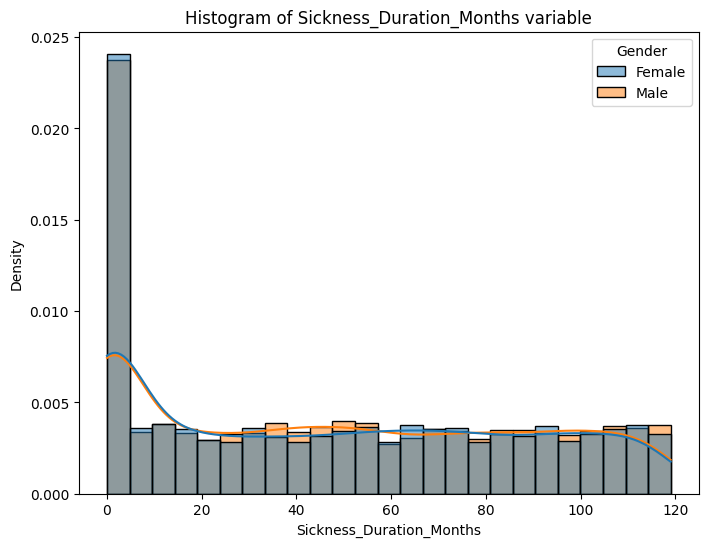

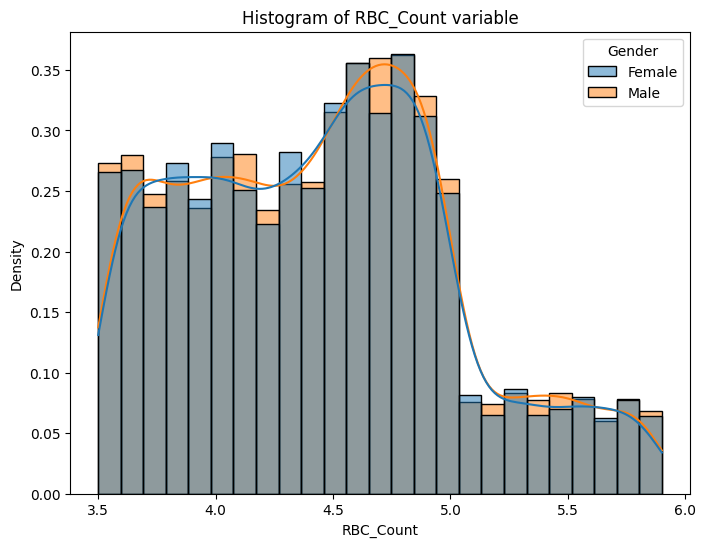

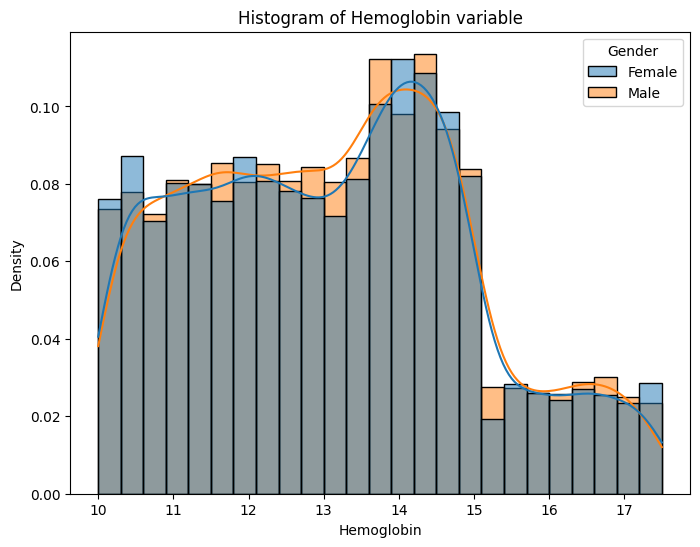

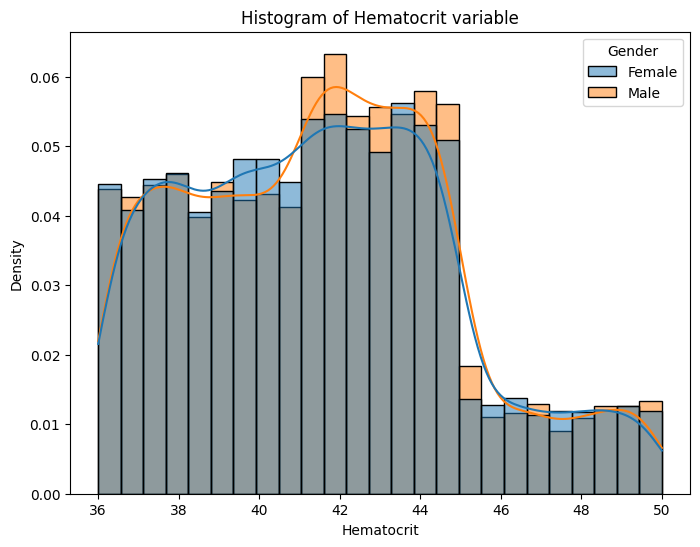

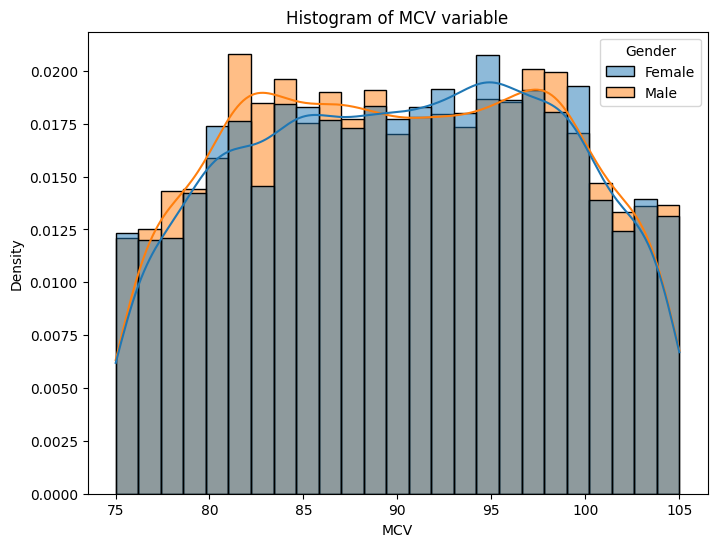

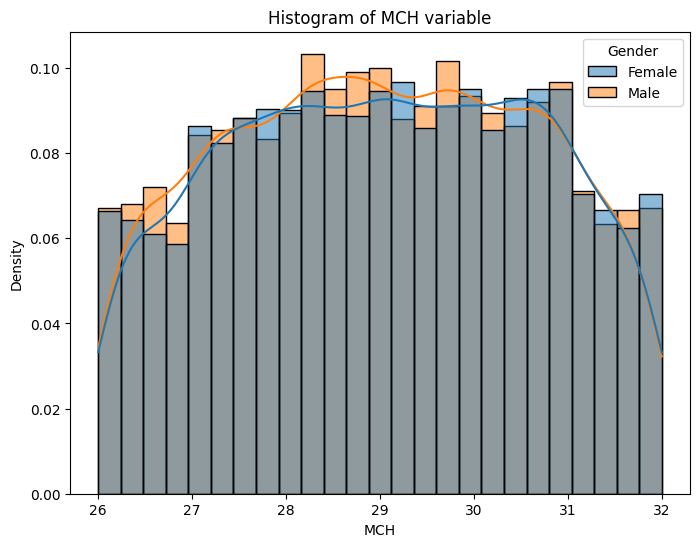

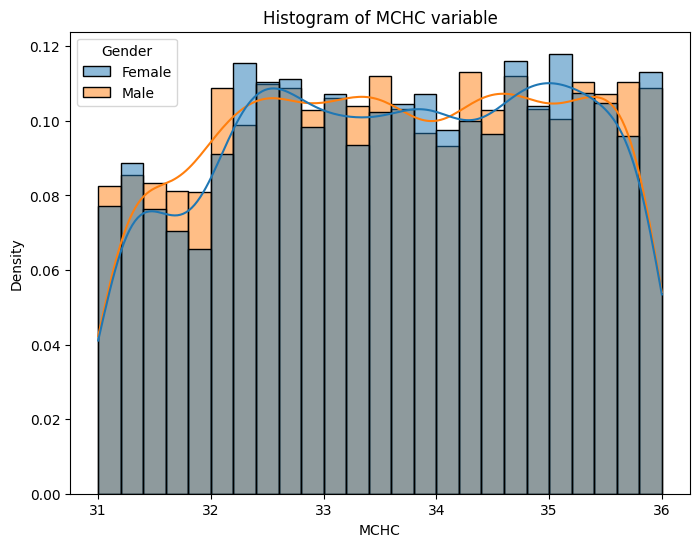

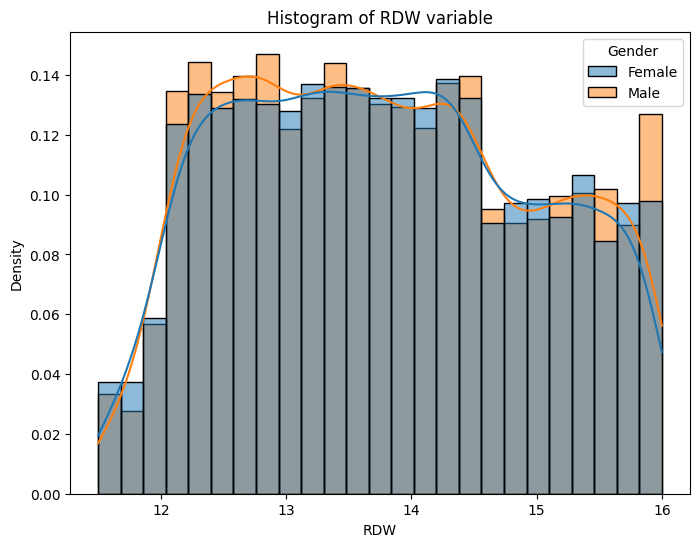

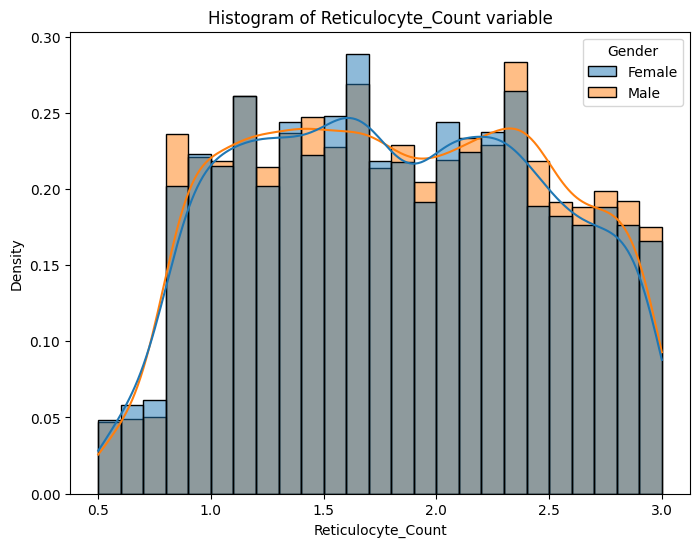

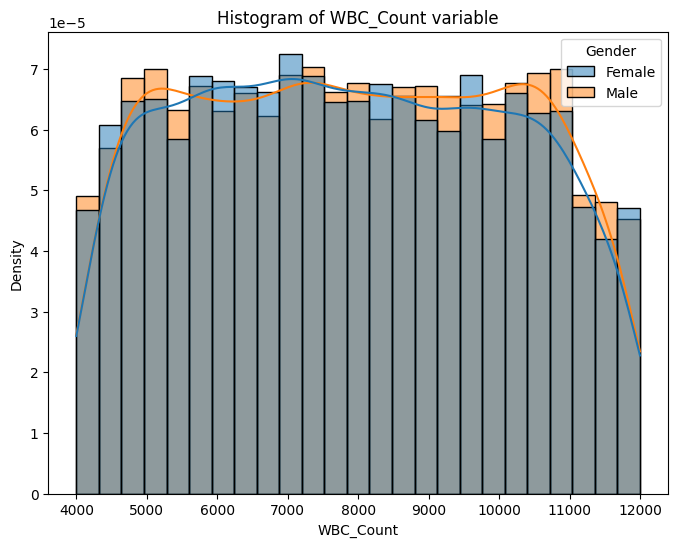

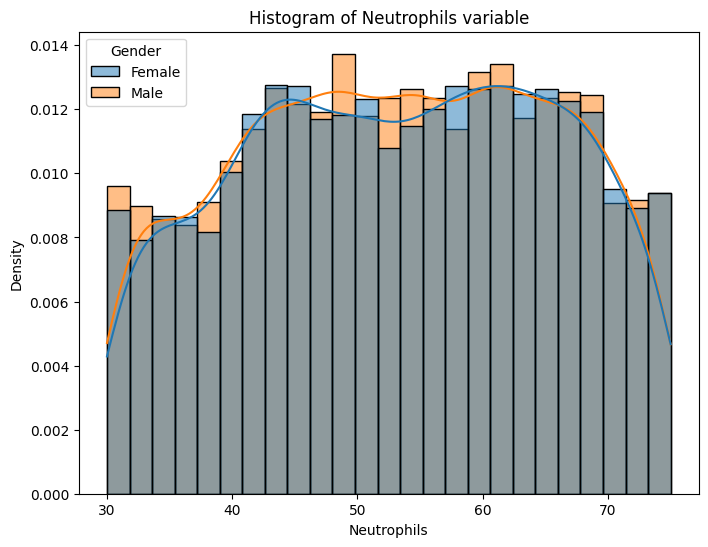

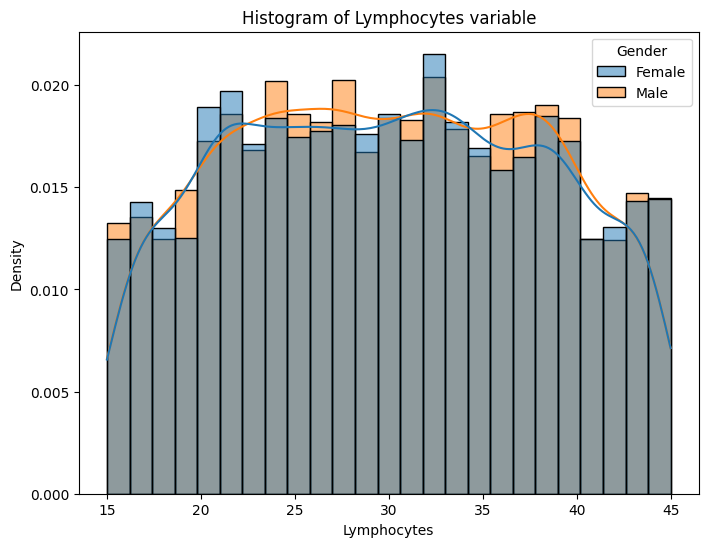

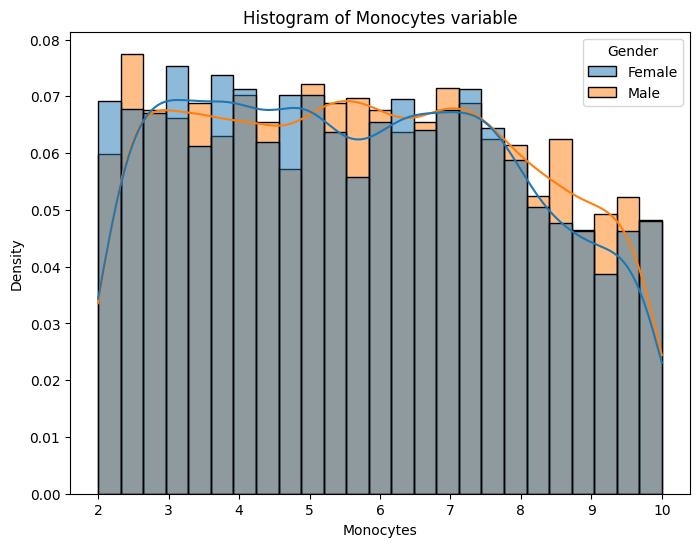

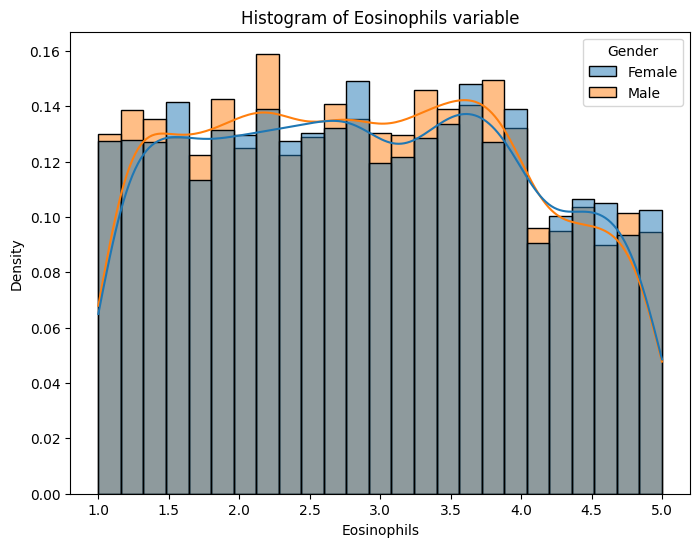

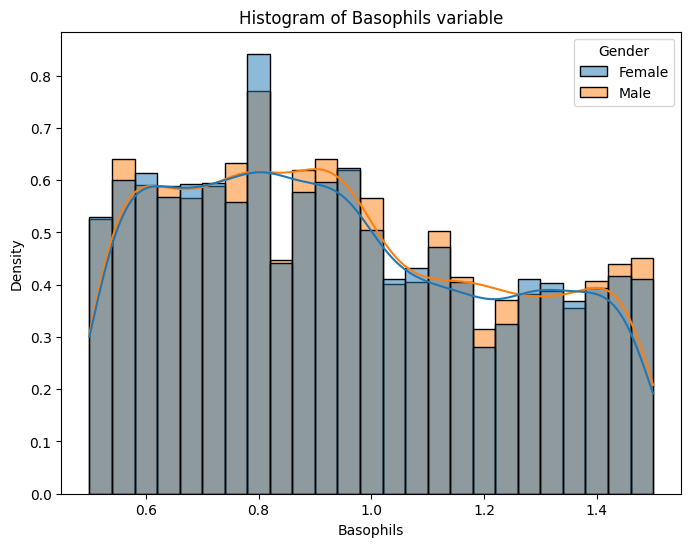

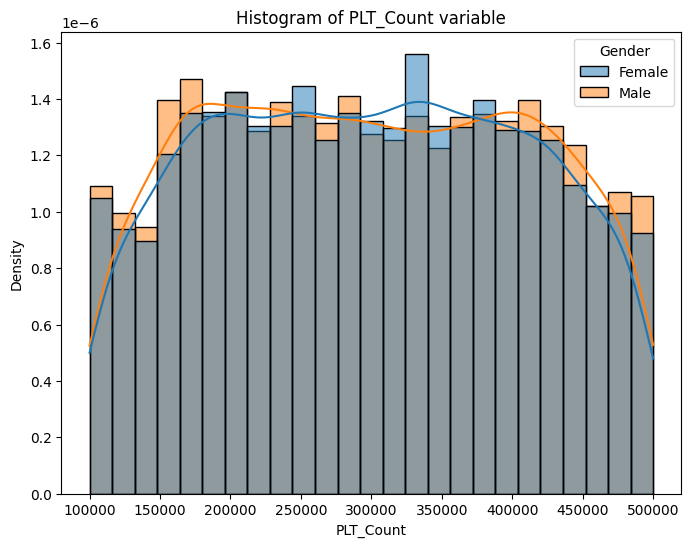

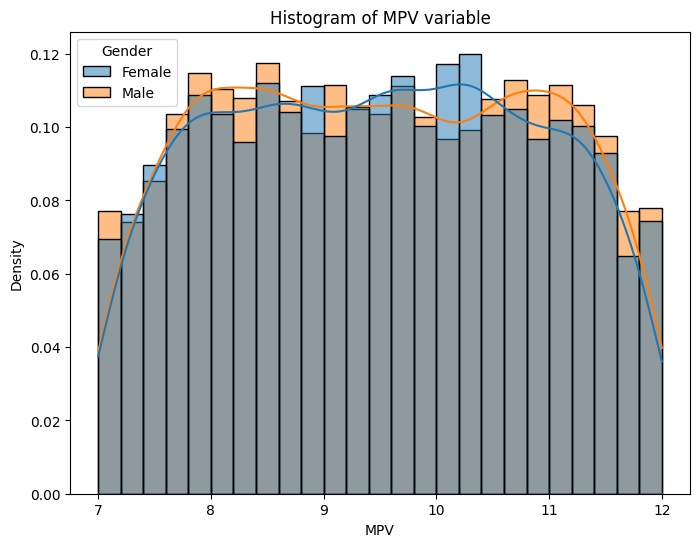

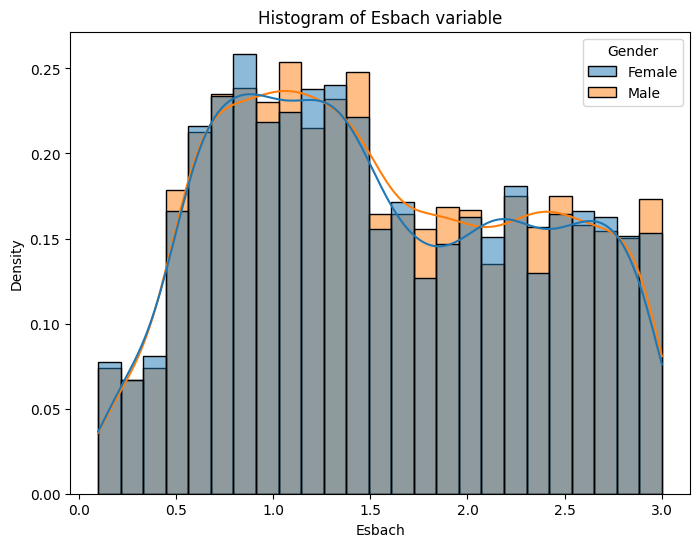

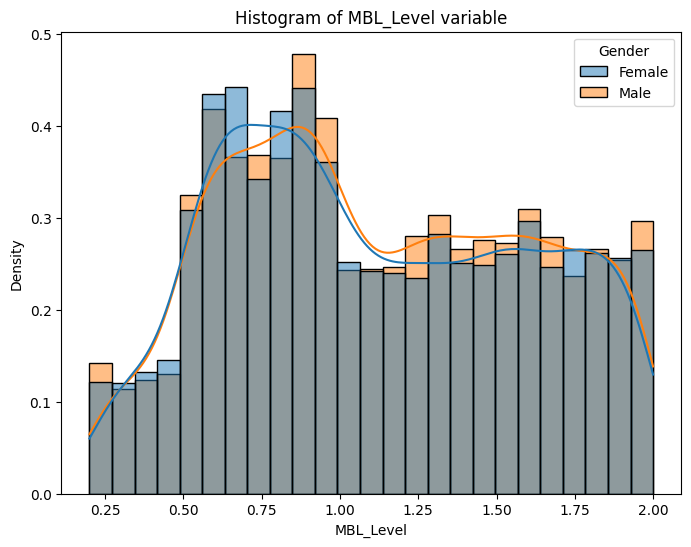

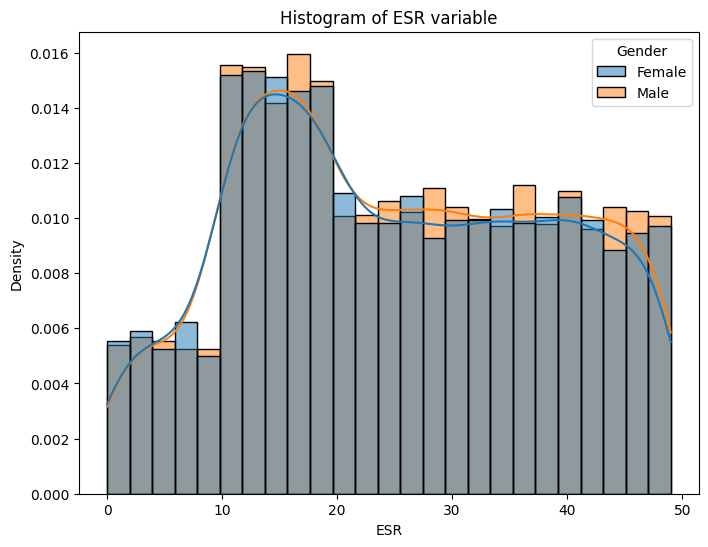

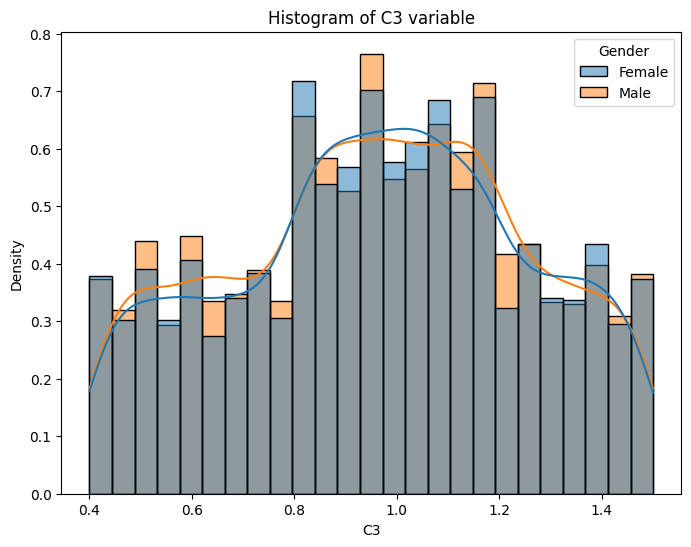

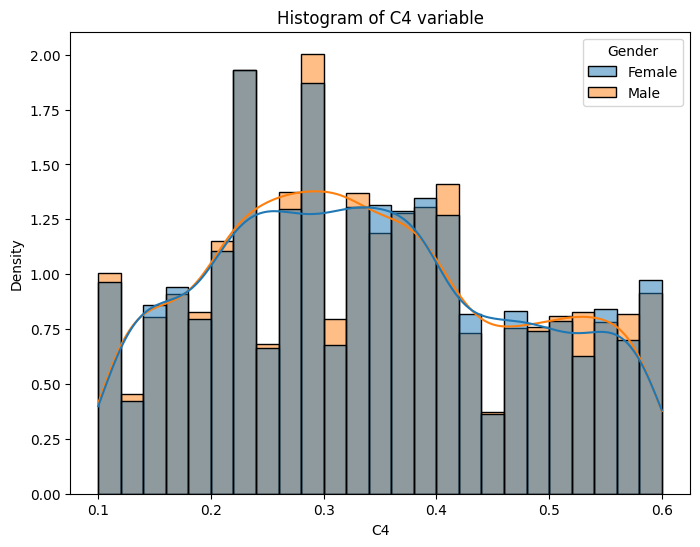

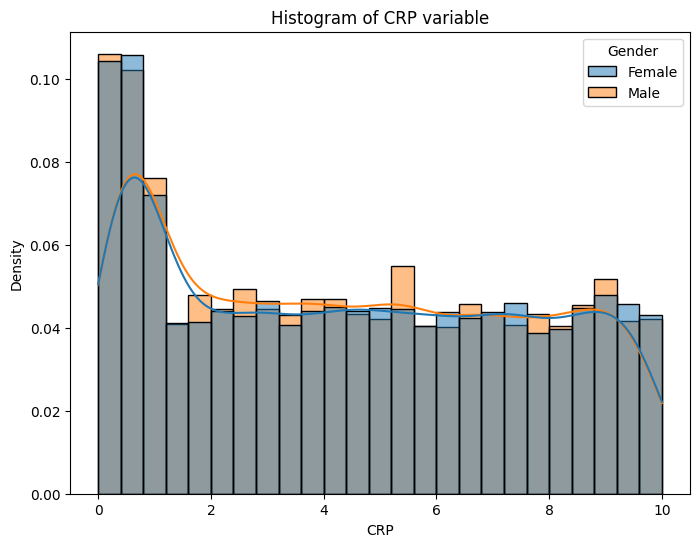

In [27]:
# histograms for numerical variables
for var in list(df.select_dtypes(include='float64').columns):
    plt.figure(figsize=(8,6))
    sns.histplot(df, x=var, bins=25, hue='Gender', kde=True, stat='density')
    plt.title(f'Histogram of {var} variable')
    plt.show()

In [28]:
df['Diseases_group'] = df['Diseases_group'].astype('category').cat.codes

In [29]:
df['Gender'] = np.where(df['Gender'] == 'Female',1,0)

In [30]:
numeric_data = df.select_dtypes(include=['float64'])

In [31]:
df['Diseases_group']

0        7
1        4
2        8
3        5
4        8
        ..
12494    6
12495    6
12496    6
12497    6
12498    6
Name: Diseases_group, Length: 12499, dtype: int8

In [32]:
numeric_data = df.select_dtypes(include=['float64','int8'])
numeric_data

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0      65.0                      26.0       3.54       13.18       44.35   
1      61.0                     106.0       4.97       14.73       42.39   
2      42.0                       6.0       3.91       13.66       42.41   
3      45.0                      11.0       4.57       14.96       40.10   
4      78.0                      30.0       4.88       11.21       37.58   
...     ...                       ...        ...         ...         ...   
12494  49.0                       0.0       5.22       14.42       48.42   
12495  54.0                       0.0       4.51       17.17       42.46   
12496  29.0                       0.0       4.62       13.72       43.65   
12497  34.0                       0.0       4.95       15.37       41.78   
12498  80.0                       0.0       4.66       16.29       46.29   

         MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0      99.85  31.80  33.12  12.52                2.08     8278.0        72.25   
1      94.86  29.94  31.07  15.15                1.21     8592.0        56.73   
2      88.26  29.43  35.61  15.52                2.68     8719.0        50.92   
3      85.95  27.42  33.93  12.14                1.79     7698.0        41.20   
4      93.16  29.87  31.29  15.65                1.42     9755.0        45.82   
...      ...    ...    ...    ...                 ...        ...          ...   
12494  91.66  30.60  32.86  12.03                2.27     7423.0        47.15   
12495  94.95  27.96  33.51  11.58                2.09     9782.0        67.33   
12496  94.54  31.00  33.55  12.25                1.48     6925.0        61.36   
12497  84.67  30.94  34.39  13.14                1.13     5136.0        51.84   
12498  88.40  29.40  33.19  14.38                0.77     8873.0        40.99   

       Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  \
0            19.80       9.26         4.02       1.08   429117.0   8.08   
1            42.68       2.66         1.67       1.16   487184.0   8.92   
2            31.21       6.96         4.32       1.07   499962.0   7.70   
3            33.60       6.54         3.12       0.72   129793.0  10.95   
4            42.57       3.05         4.60       1.40   467390.0  10.51   
...            ...        ...          ...        ...        ...    ...   
12494        23.92       4.69         2.61       0.50   215737.0   7.90   
12495        29.90       2.25         2.21       0.60   437118.0  10.00   
12496        25.25       4.57         1.14       0.67   353269.0   8.21   
12497        24.88       7.04         1.43       0.81   234526.0   8.58   
12498        31.21       4.30         3.95       0.60   177713.0   9.23   

       Esbach  MBL_Level   ESR    C3    C4   CRP  Diseases_group  
0        1.50       1.81  40.0  1.32  0.49  3.10               7  
1        1.76       1.08  23.0  0.40  0.17  2.73               4  
2        2.49       1.42  44.0  0.95  0.26  1.02               8  
3        0.75       1.05  25.0  1.06  0.26  5.45               5  
4        0.76       1.14  42.0  0.73  0.25  1.05               8  
...       ...        ...   ...   ...   ...   ...             ...  
12494    1.20       0.41   2.0  0.84  0.39  0.84               6  
12495    0.79       0.24  13.0  0.83  0.25  0.81               6  
12496    1.34       0.37  10.0  0.95  0.33  0.64               6  
12497    1.33       0.33  19.0  0.94  0.38  0.46               6  
12498    0.20       0.53  10.0  1.12  0.21  0.56               6  

[12499 rows x 25 columns]

In [33]:
categorical_data = df.select_dtypes(include=['int64','int32','int8'])
categorical_data

Gender  ANA  Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  \
0           1    1           1        1                  0     1         0   
1           0    1           0        0                  1     1         0   
2           0    1           1        0                  1     1         1   
3           1    1           0        1                  0     1         1   
4           1    1           0        1                  0     1         0   
...       ...  ...         ...      ...                ...   ...       ...   
12494       1    0           0        0                  0     0         0   
12495       0    0           0        0                  0     0         0   
12496       0    0           0        0                  0     0         0   
12497       0    0           0        0                  0     0         0   
12498       0    0           0        0                  0     0         0   

       Anti-Tg  Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  \
0            1         1                0                             1   
1            1         0                1                             0   
2            1         1                0                             1   
3            1         0                1                             0   
4            0         1                0                             1   
...        ...       ...              ...                           ...   
12494        0         0                0                             0   
12495        0         0                0                             0   
12496        0         0                0                             0   
12497        0         0                0                             0   
12498        0         0                0                             0   

       Dizziness  Weight loss  Rashes and skin lesions  \
0              1            0                        0   
1              0            1                        1   
2              1            0                        1   
3              1            1                        1   
4              1            1                        0   
...          ...          ...                      ...   
12494          0            0                        0   
12495          0            0                        0   
12496          0            0                        0   
12497          0            0                        0   
12498          0            0                        0   

       Stiffness in the joints  Brittle hair or hair loss  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          1   
4                            1                          0   
...                        ...                        ...   
12494                        0                          0   
12495                        0                          0   
12496                        0                          0   
12497                        0                          0   
12498                        0                          0   

       Dry eyes and/or mouth  General unwell feeling  Joint pain  Anti_dsDNA  \
0                          0                       1           1           0   
1                          0                       0           1           0   
2                          0                       0           0           0   
3                          1                       1           0           0   
4                          0                       1           0           0   
...                      ...                     ...         ...         ...   
12494                      0                       0           0           0   
12495                      0                       0           0           0   
12496              

In [34]:
categorical_data

Gender  ANA  Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  \
0           1    1           1        1                  0     1         0   
1           0    1           0        0                  1     1         0   
2           0    1           1        0                  1     1         1   
3           1    1           0        1                  0     1         1   
4           1    1           0        1                  0     1         0   
...       ...  ...         ...      ...                ...   ...       ...   
12494       1    0           0        0                  0     0         0   
12495       0    0           0        0                  0     0         0   
12496       0    0           0        0                  0     0         0   
12497       0    0           0        0                  0     0         0   
12498       0    0           0        0                  0     0         0   

       Anti-Tg  Anti-SMA  Low-grade fever  Fatigue or chronic tiredness  \
0            1         1                0                             1   
1            1         0                1                             0   
2            1         1                0                             1   
3            1         0                1                             0   
4            0         1                0                             1   
...        ...       ...              ...                           ...   
12494        0         0                0                             0   
12495        0         0                0                             0   
12496        0         0                0                             0   
12497        0         0                0                             0   
12498        0         0                0                             0   

       Dizziness  Weight loss  Rashes and skin lesions  \
0              1            0                        0   
1              0            1                        1   
2              1            0                        1   
3              1            1                        1   
4              1            1                        0   
...          ...          ...                      ...   
12494          0            0                        0   
12495          0            0                        0   
12496          0            0                        0   
12497          0            0                        0   
12498          0            0                        0   

       Stiffness in the joints  Brittle hair or hair loss  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          1   
4                            1                          0   
...                        ...                        ...   
12494                        0                          0   
12495                        0                          0   
12496                        0                          0   
12497                        0                          0   
12498                        0                          0   

       Dry eyes and/or mouth  General unwell feeling  Joint pain  Anti_dsDNA  \
0                          0                       1           1           0   
1                          0                       0           1           0   
2                          0                       0           0           0   
3                          1                       1           0           0   
4                          0                       1           0           0   
...                      ...                     ...         ...         ...   
12494                      0                       0           0           0   
12495                      0                       0           0           0   
12496              

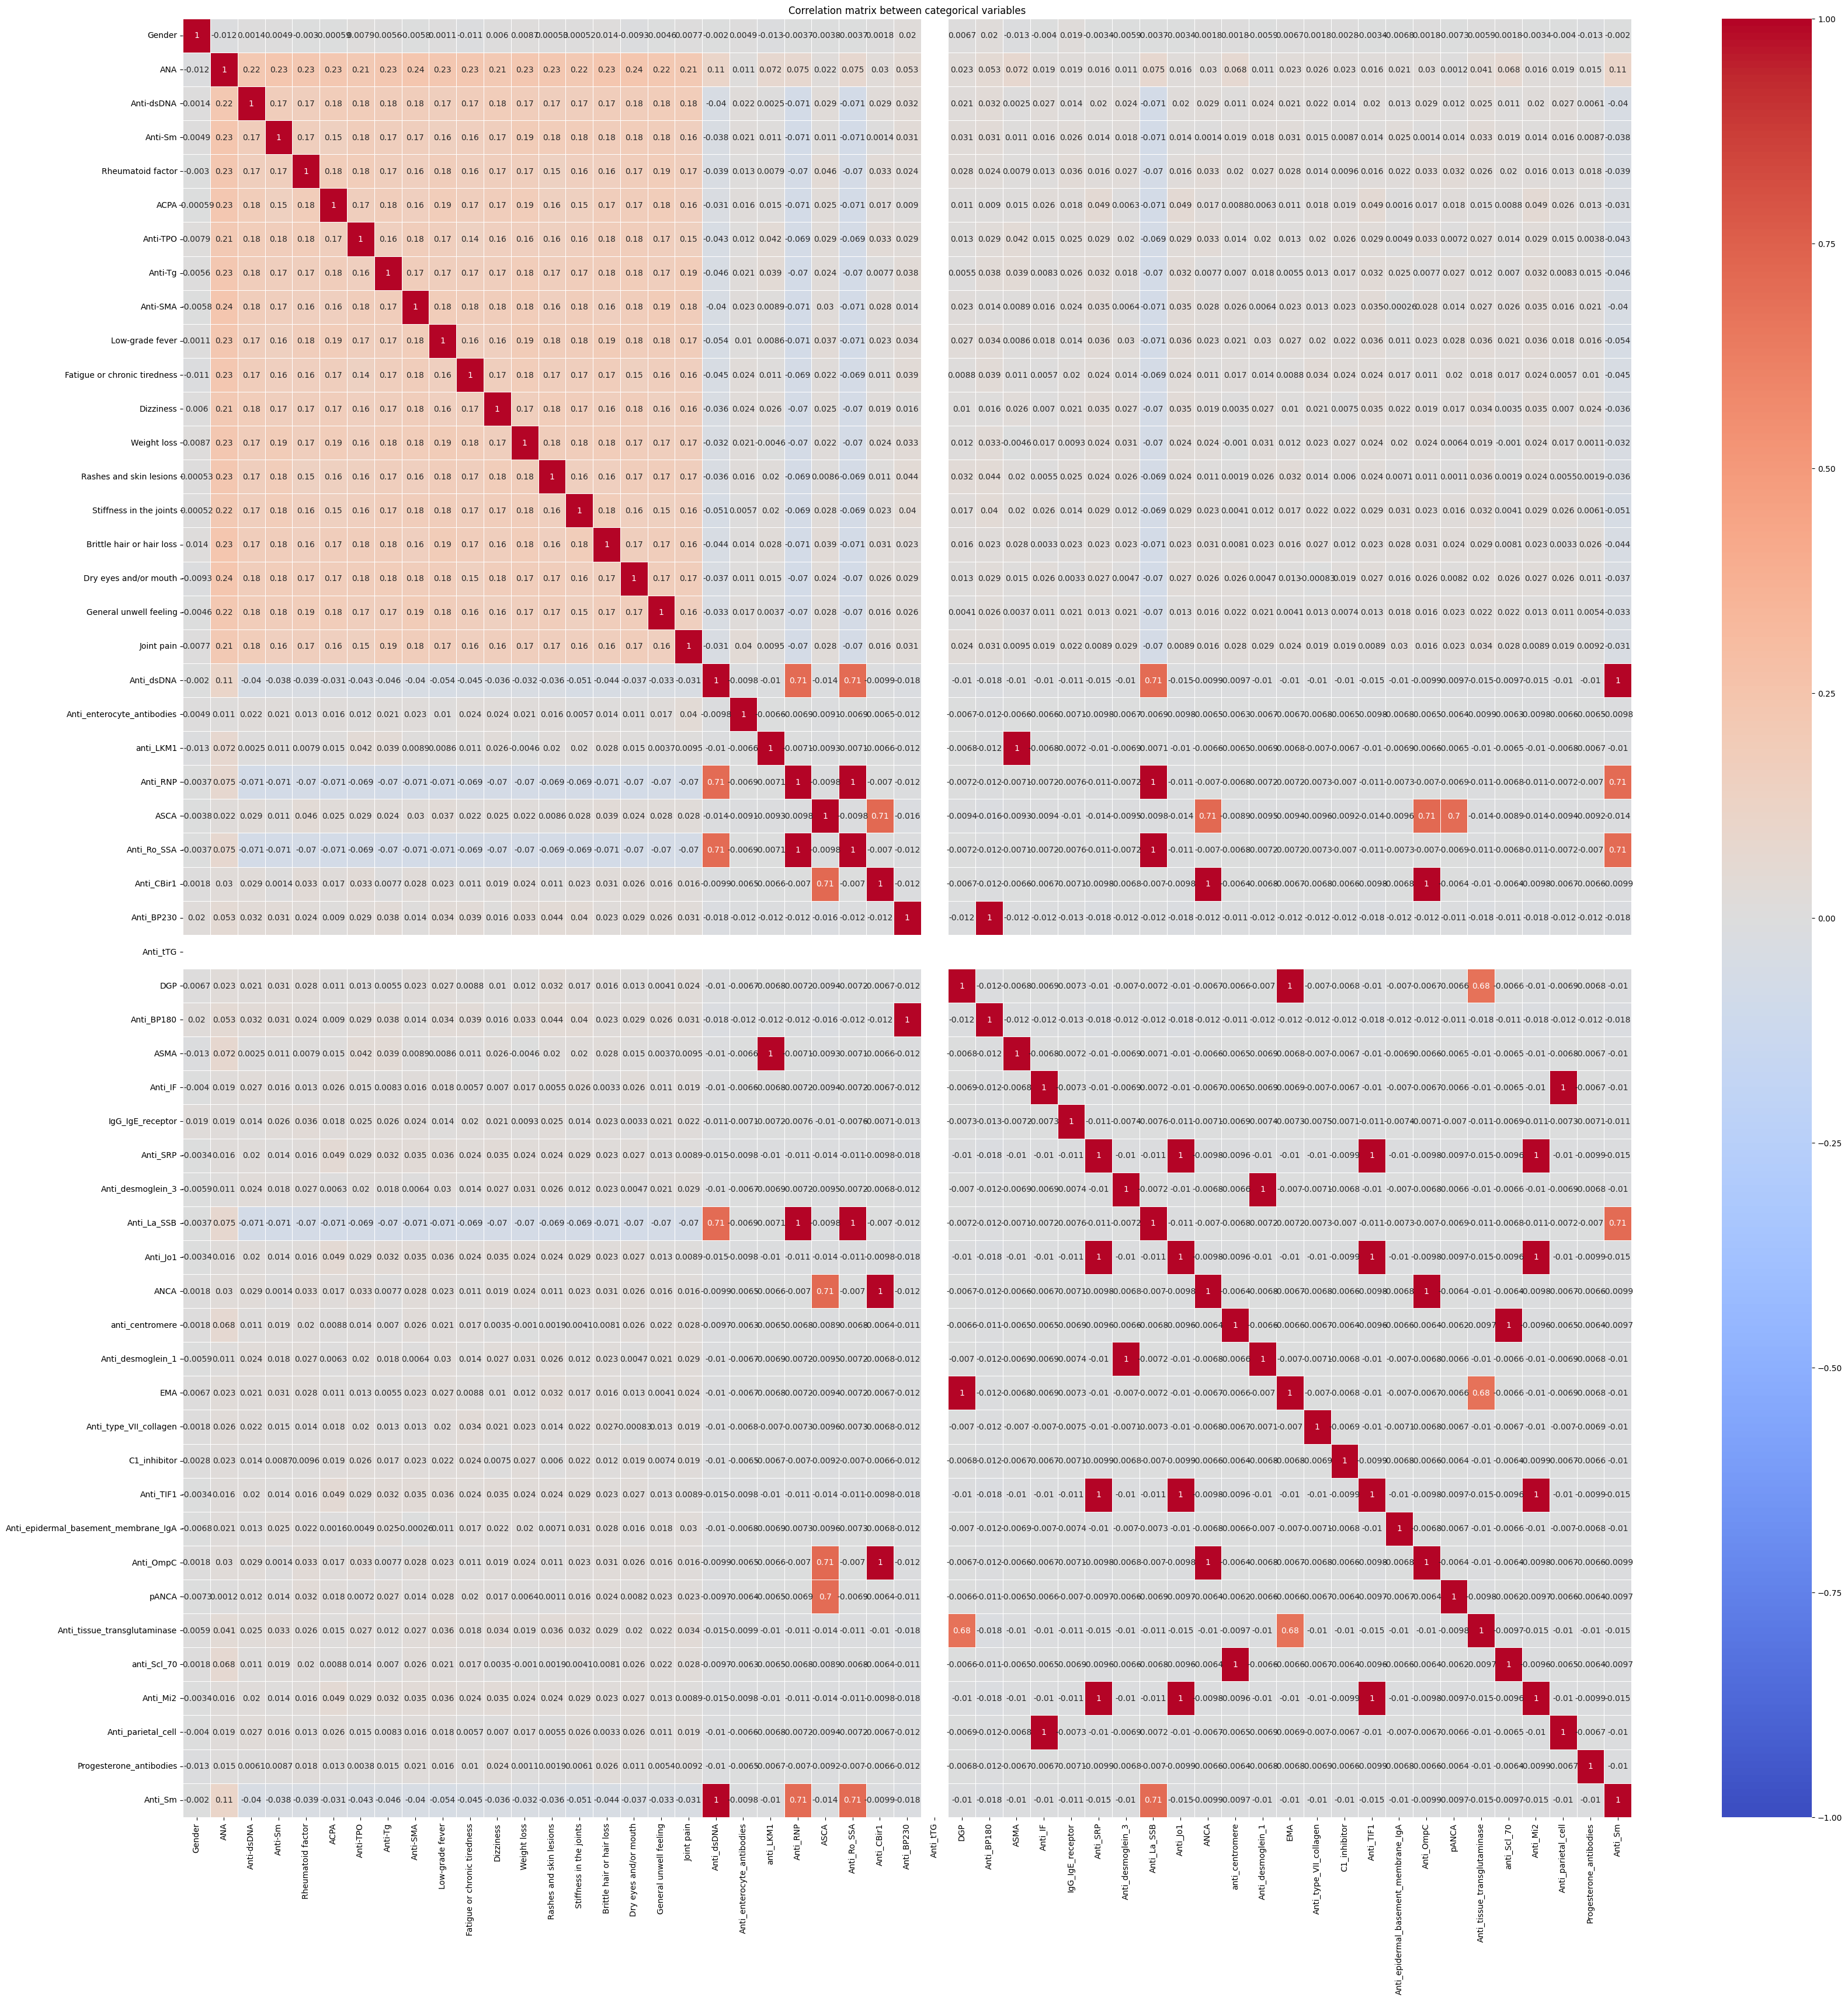

In [35]:
cat_var_corr_matrix = categorical_data.drop(columns='Diseases_group',axis=1).corr(method='spearman')

plt.figure(figsize=(40,40))
sns.heatmap(cat_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables')
plt.show()

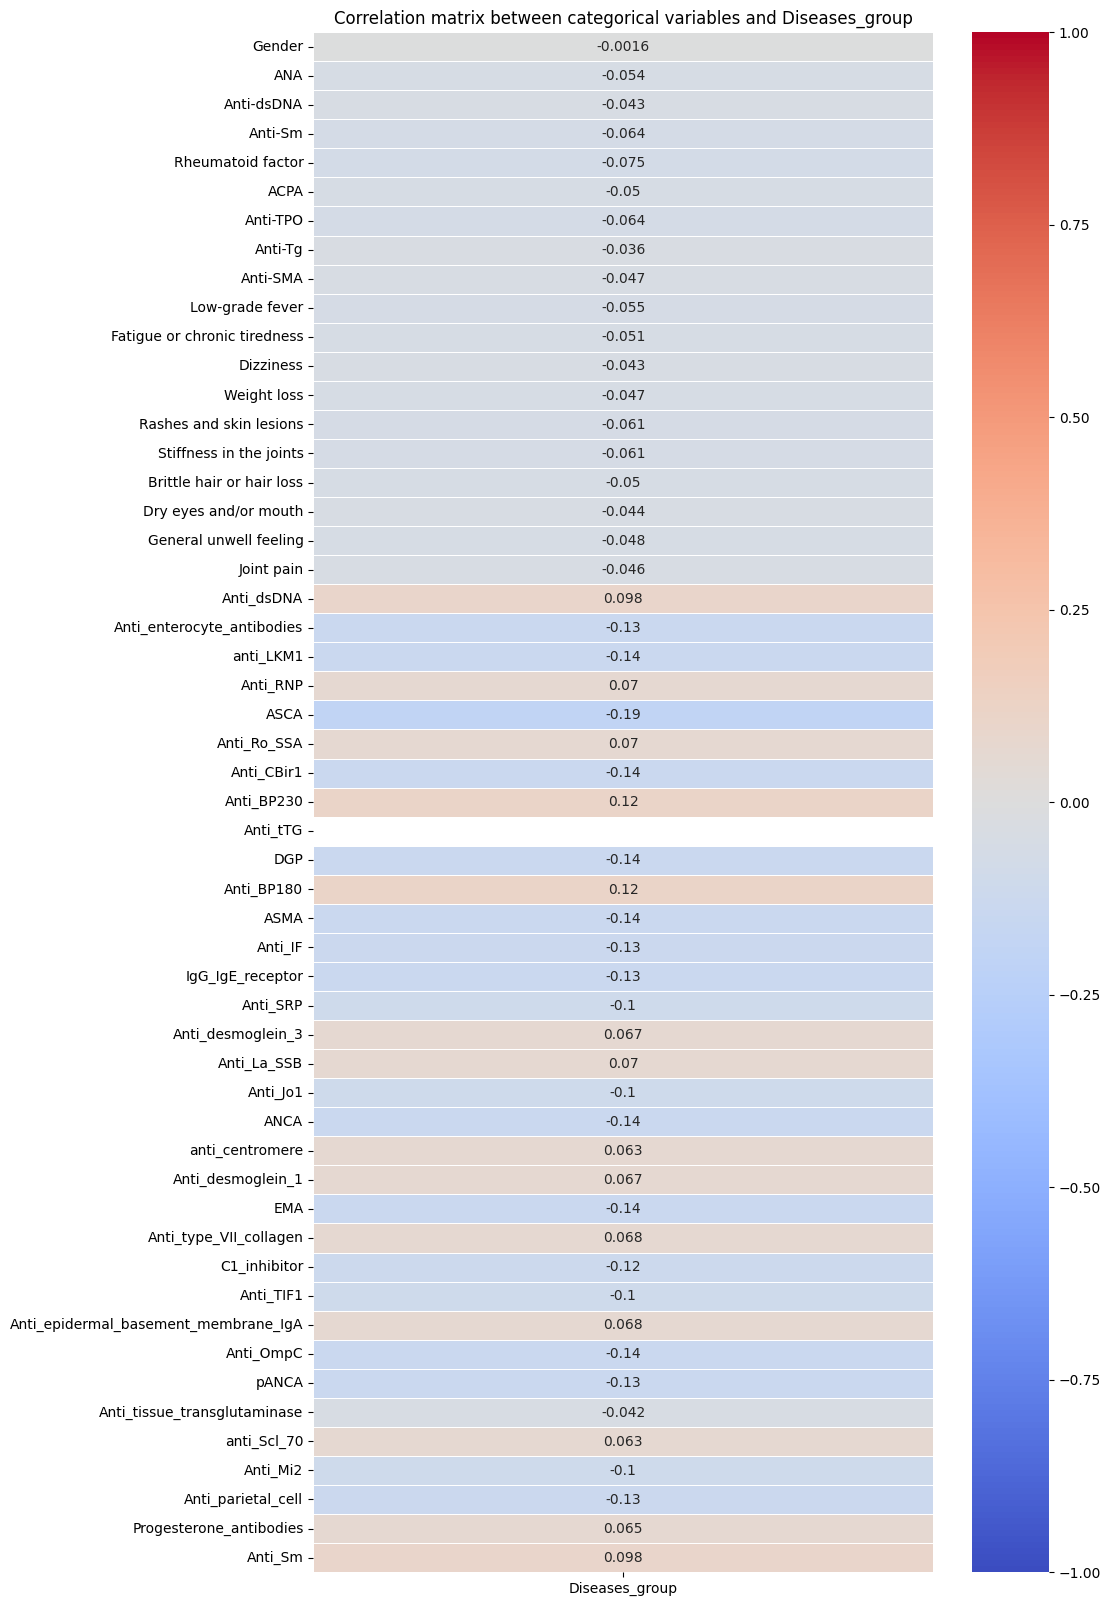

In [36]:
cat_var_y_corr_matrix = categorical_data.corr(method='spearman')

plt.figure(figsize=(10,20))
cat_diseases_corr = cat_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(cat_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables and Diseases_group')
plt.show()

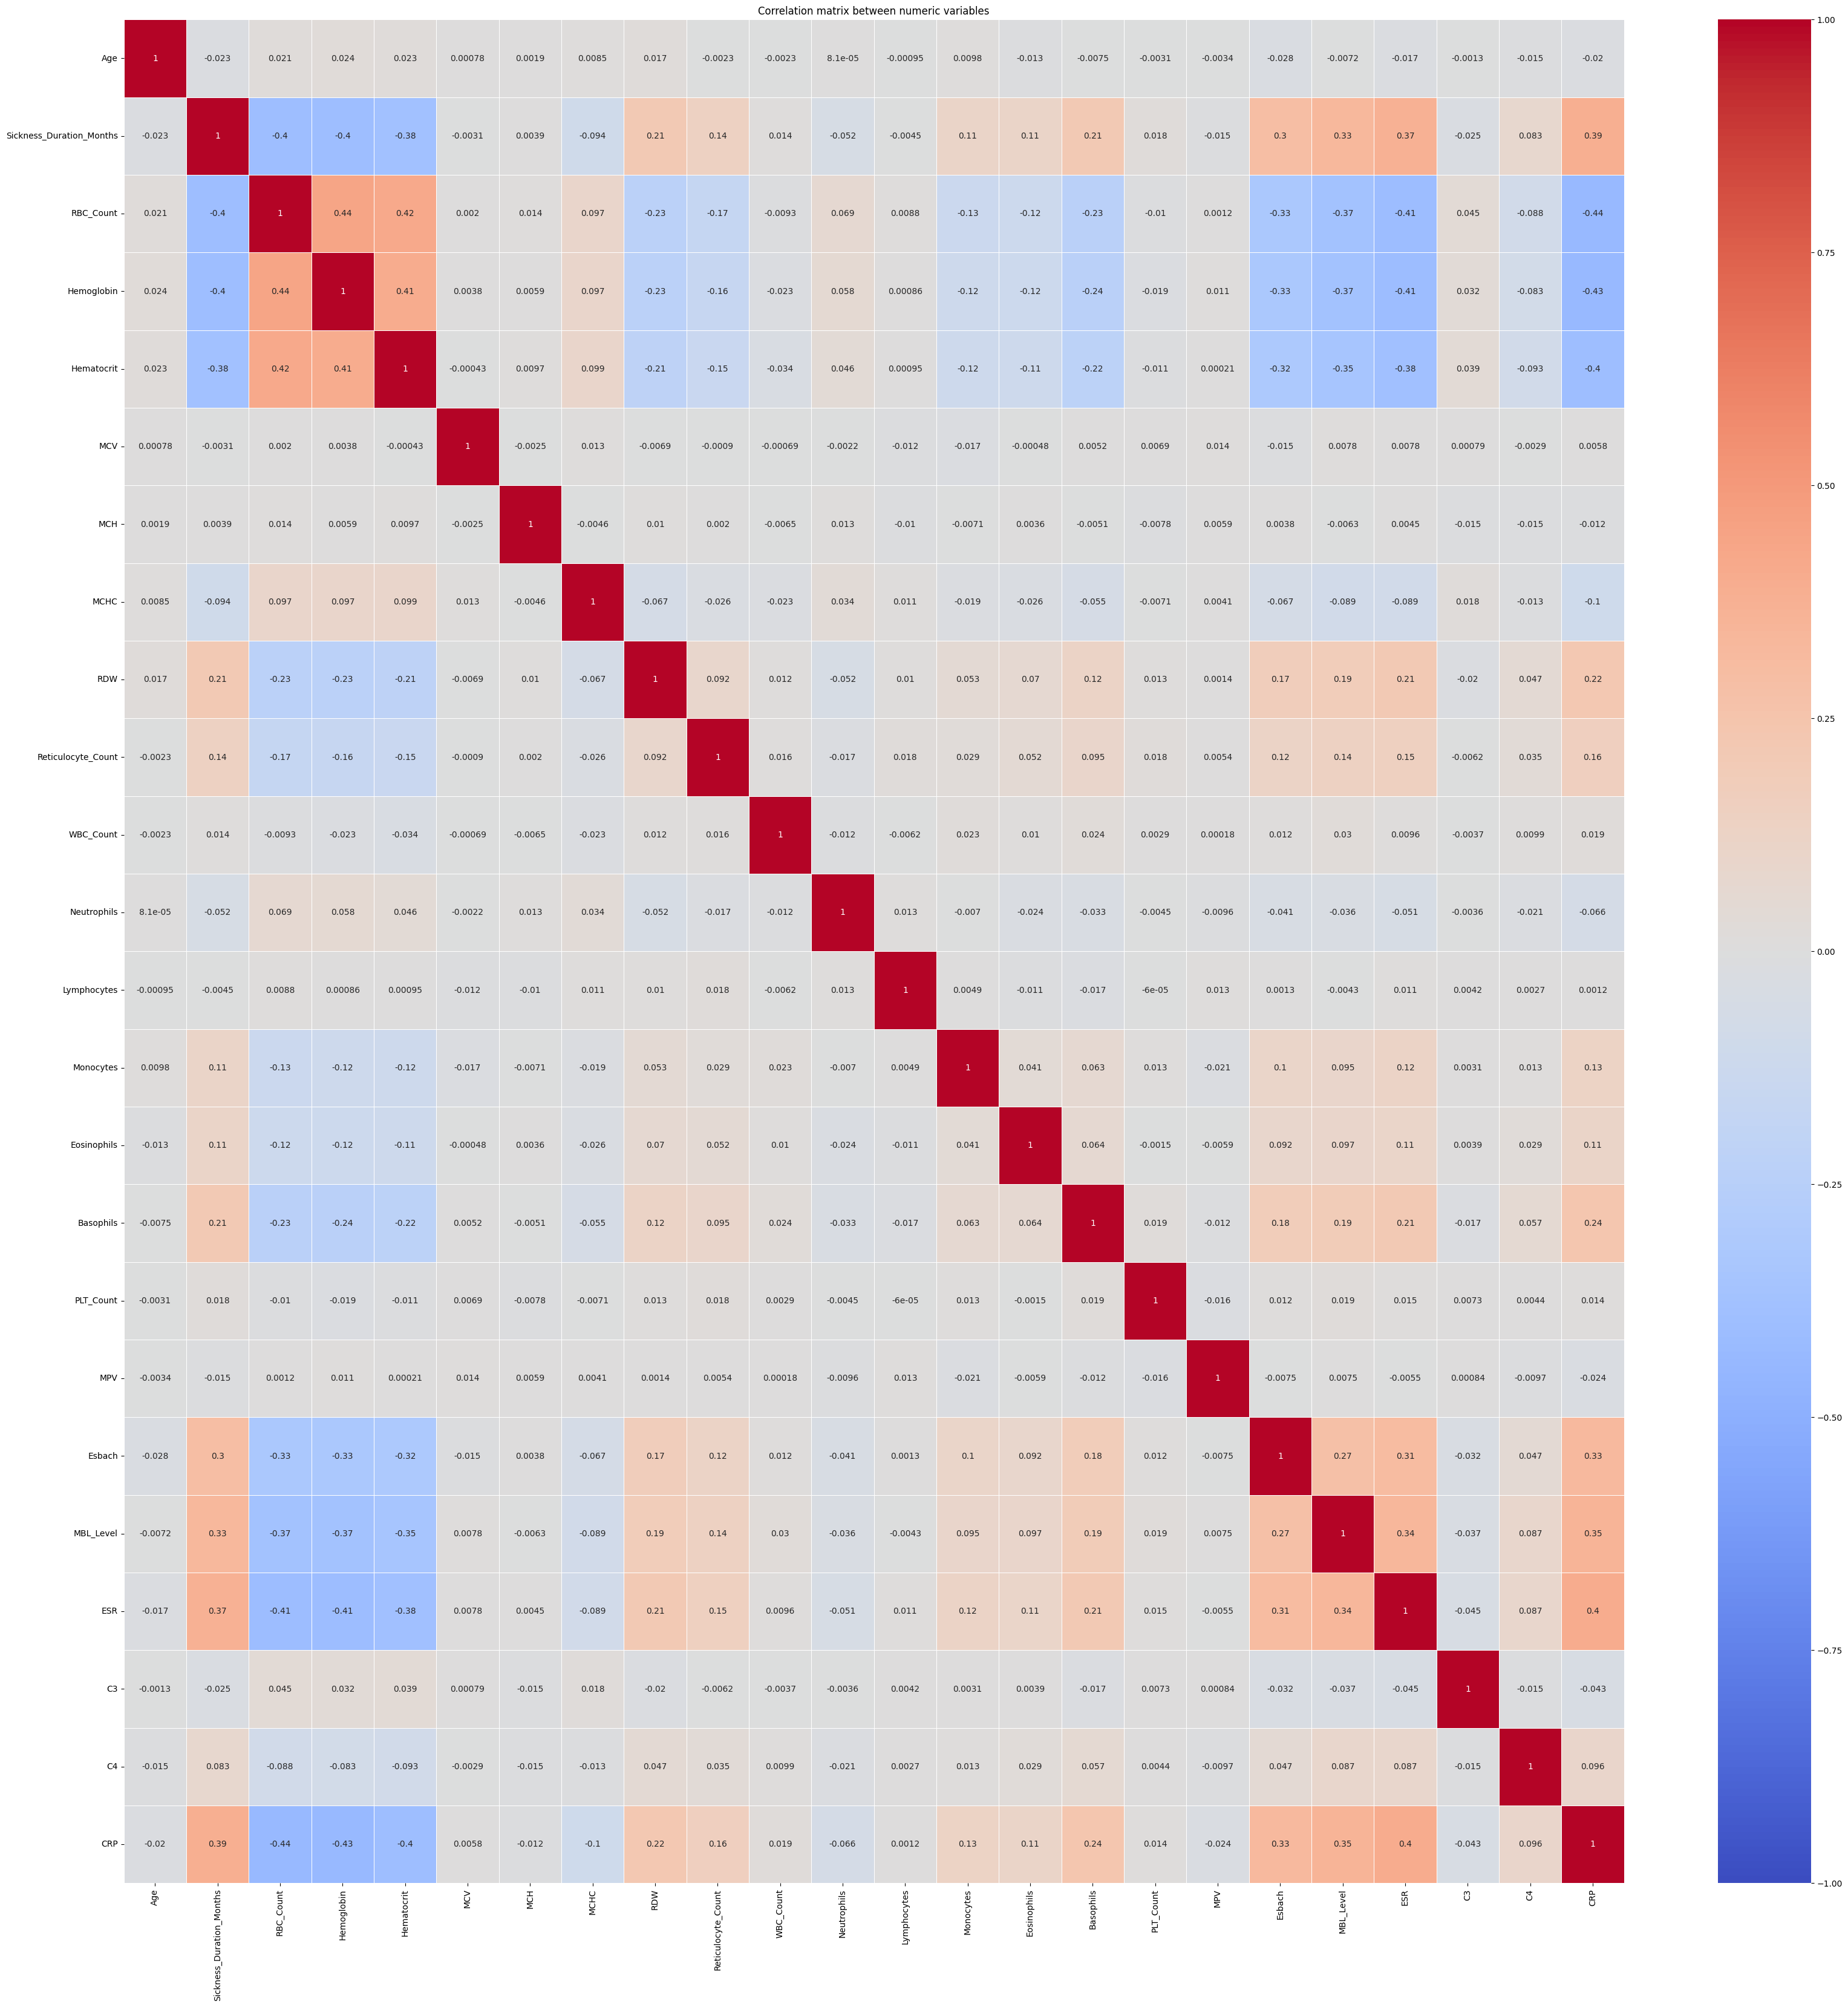

In [37]:
num_var_corr_matrix = numeric_data.drop(columns='Diseases_group',axis=1).corr(method='pearson')

# num_var_corr_matrix = numeric_data_prim.corr(method='pearson')

plt.figure(figsize=(40,40))
sns.heatmap(num_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables')
plt.show()

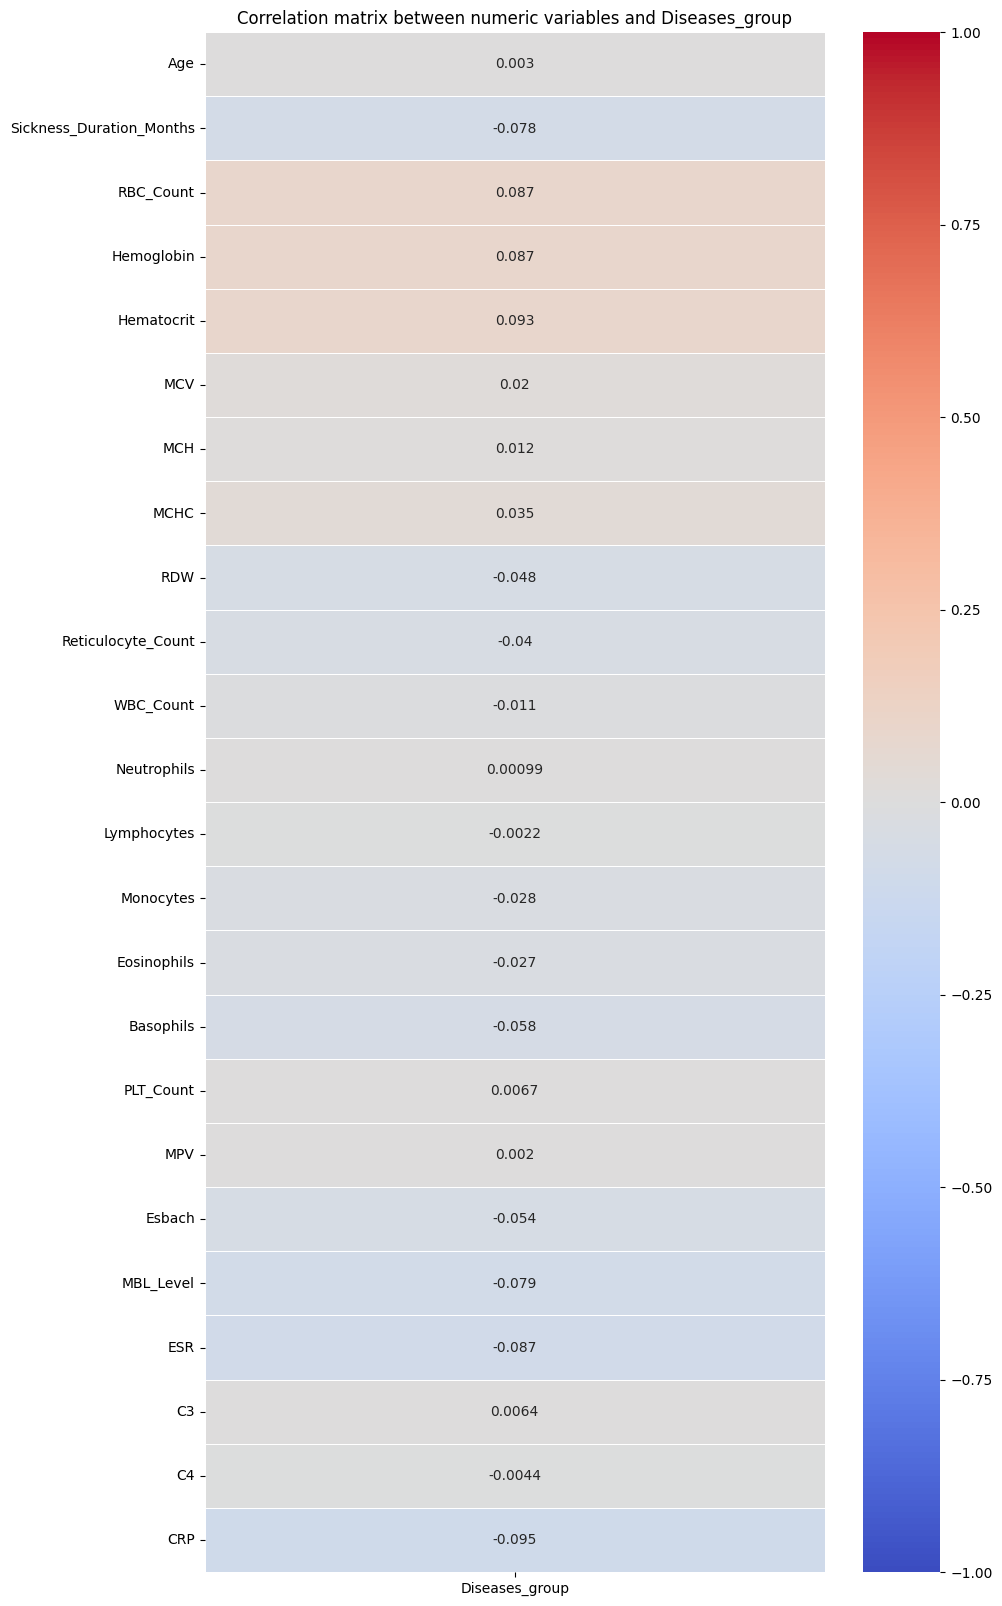

In [38]:
num_var_y_corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,20))
num_diseases_corr = num_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(num_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables and Diseases_group')
plt.show()

Because Pearson correlation values for numerical data are very low, we can check if there are some kind of different (not linear) relation between numerical columns

In [39]:
from pandas.plotting import scatter_matrix

num_attributes_1 = ['Age', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH']

num_attributes_2 = ['MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils']

num_attributes_3 = ['Basophils', 'PLT_Count', 'MPV', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP']

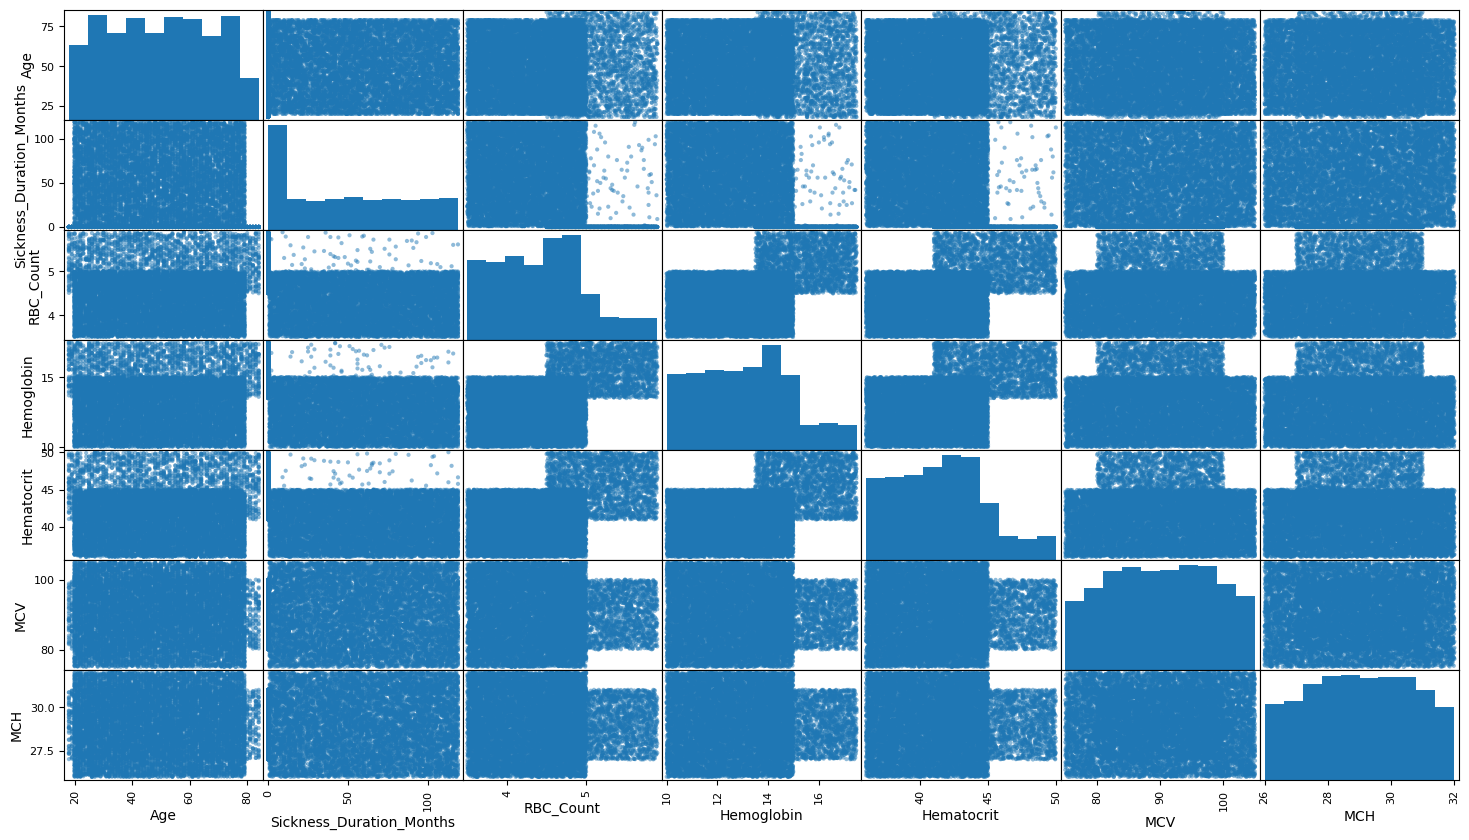

In [40]:
scatter_matrix(numeric_data[num_attributes_1],figsize=(18,10))
plt.show()

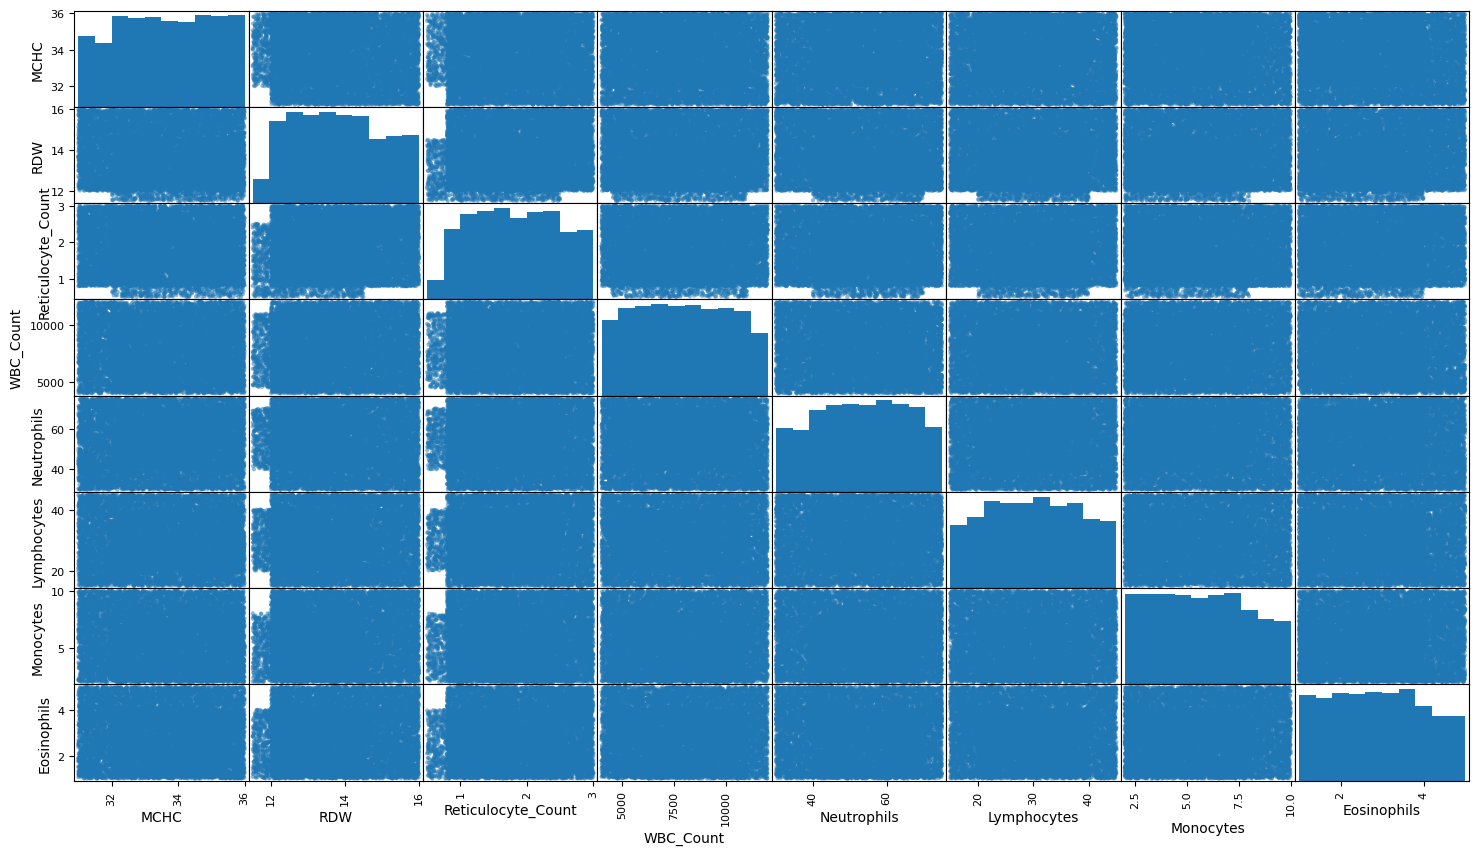

In [41]:
scatter_matrix(numeric_data[num_attributes_2],figsize=(18,10))
plt.show()

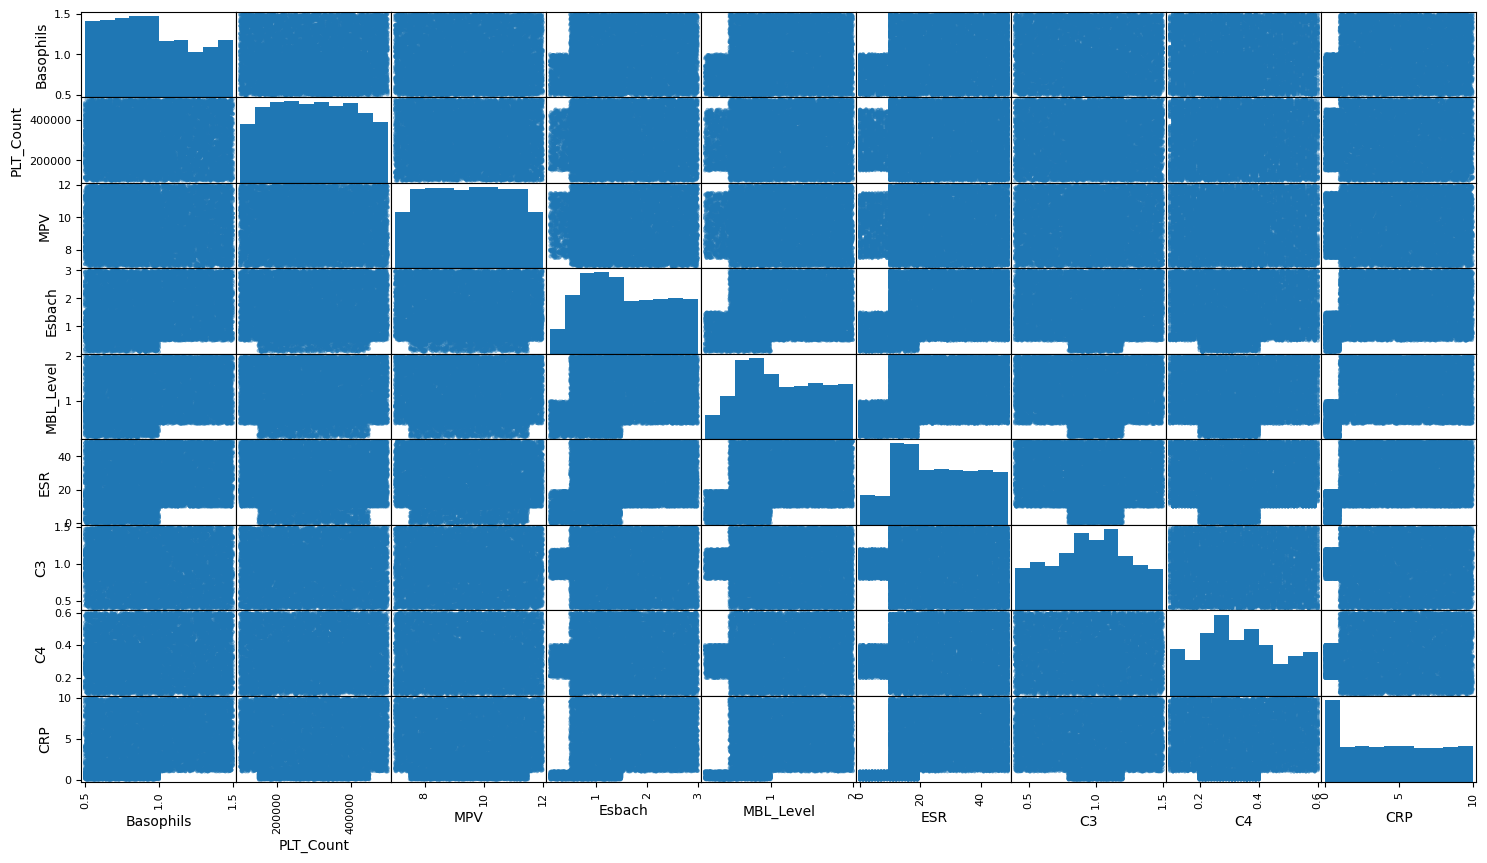

In [42]:
scatter_matrix(numeric_data[num_attributes_3],figsize=(18,10))
plt.show()

In [43]:
binary_low_variance_col = [
    "Anti_dsDNA", "Anti_enterocyte_antibodies", "anti_LKM1", "Anti_RNP", "ASCA",
    "Anti_Ro_SSA", "Anti_CBir1", "Anti_BP230", "DGP", "Anti_BP180", "ASMA", "Anti_IF",
    "IgG_IgE_receptor", "Anti_SRP", "Anti_desmoglein_3", "Anti_La_SSB", "Anti_Jo1",
    "ANCA", "anti_centromere", "Anti_desmoglein_1", "EMA", "Anti_type_VII_collagen",
    "C1_inhibitor", "Anti_TIF1", "Anti_epidermal_basement_membrane_IgA", "Anti_OmpC",
    "pANCA", "Anti_tissue_transglutaminase", "anti_Scl_70", "Anti_Mi2", "Anti_parietal_cell",
    "Progesterone_antibodies", "Anti_Sm"
]

for col in binary_low_variance_col:
    crosstab_table = pd.crosstab(df[col], df['Diseases_group'])
    print(f"Crosstab for {col} and Diseases_group:")
    print(crosstab_table)
    print("\n" + "-"*80 + "\n")

Crosstab for Anti_dsDNA and Diseases_group:
Diseases_group    0    1    2     3    4     5     6     7     8     9
Anti_dsDNA                                                            
0               485  677  506  1171  752  2206  2499  1464  1222  1332
1                 0    0    0     0    0     0     0   185     0     0

--------------------------------------------------------------------------------

Crosstab for Anti_enterocyte_antibodies and Diseases_group:
Diseases_group                0    1    2     3    4     5     6     7     8  \
Anti_enterocyte_antibodies                                                     
0                           405  677  506  1171  752  2206  2499  1649  1222   
1                            80    0    0     0    0     0     0     0     0   

Diseases_group                 9  
Anti_enterocyte_antibodies        
0                           1332  
1                              0  

-------------------------------------------------------------------

To finalize our EDA analysis we will calculate Information Value of each variable to get an information about its predictive power before we go forward to modelling

In [44]:
def iv_calc_one(data, feature, target):
    
    # WoE data calculation
    df_woe = (pd.crosstab(data[feature], data[target], normalize=True)
              .assign(woe=lambda probe: np.log(probe[1]/probe[0])))
    
    # IV data calculation
    iv_value = df_woe.assign(iv=lambda probe: np.sum(probe['woe'] * (probe[1]/probe[0])))
    iv_value = pd.Series(iv_value.iloc[:,-1]).unique()[0]
    
    return iv_value

In [45]:
# function to calculate Information Value and Weight of Evidence
# WoE = ln(Non_event_percentage/Event_percentage)
# IV = sigma(Event_percentage - Non_event_percentage) * WoE
# Event is probe when we have patient with one of our targeted diseases
# Non-event is probe when we have patient with one of our targeted diseases

def iv_calc(data, target, bins=10, woe_show=True):
    
    # Data frames to fill
    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    
    # Independent variables list
    col_list = data.columns
    
    # WOE and IV calculation for each independent variable
    for col in col_list[~col_list.isin([target])]:
        if (data[col].dtype.kind in 'bifc') and (len(np.unique(data[col])) > 10):
            binned_x = pd.qcut(data[col], bins, duplicates='drop') # binned_x is to balance number of observation in each bin, so WoE wouldn't be biased
            d_temp = pd.DataFrame({'x': binned_x,
                                   'y': data[target]})
        else:
            d_temp = pd.DataFrame({'x': data[col],
                                   'y': data[target]})
            
        # Number of events in each group (bin)
        d = d_temp.groupby('x', as_index=False).agg({
            'y': ['count','sum']})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Percentage of events in each group (bin)
        d['Event_percentage'] = d['Events']/d['Events'].sum()
        
        # Non-events in each group (bin)
        d['Non_events'] = np.abs(d['N'] - d['Events'])
        # Non-events percentage in each group
        d['Non_event_percentage'] = d['Non_events']/d['Non_events'].sum()
        
        # WoE calculation 
        d['WoE'] = np.log(d['Event_percentage']/d['Non_event_percentage'])
        d['IV'] = d['WoE'] * (d['Event_percentage'] - d['Non_event_percentage'])
        d.insert(loc=0, column='Variable', value=col)
        tmp = pd.DataFrame({'Variable': [col],
                            'IV': [d['IV'].sum()]},
                            columns = ['Variable','IV'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
        
        # Whether to show WoE data frame
        if woe_show == True:
            print(woe_df)
    
    return iv_df, woe_df

In [46]:
# calculation of Information Value for variables in our dataset
iv_df = iv_calc(data=df, target='Diseases_group', bins=10, woe_show=False)[0]
iv_df[(iv_df['IV'] >= 0.1) & (iv_df['IV'] <= 0.5)]

Empty DataFrame
Columns: [Variable, IV]
Index: []

According to the outcomes of above IV analysis there are no variables that seem to have medium or strong predictive power

**Summary of Data Preprocessing and EDA for Classification Model**

 - Data Type Conversion: Data types of certain variables were converted from 'object' to 'float' or 'int' as needed for numerical operations.
 - Missing Data Handling: Rows containing missing values were removed from the dataset.
 - Duplicate Removal: There were no duplicate records in the dataset.
 - Outlier Detection and Correction: Outliers and erroneous values were detected using z-score analysis for numerical variables and frequency distribution analysis for binary and categorical variables. No outliers or erroneous values were found.
 - Low Variance Features: Features with extremely low variance (e.g., where 97% or more of the values belong to one category) were identified: Anti_dsDNA, Anti_enterocyte_antibodies, anti_LKM1, Anti_RNP, ASCA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_BP180, ASMA, Anti_IF, IgG_IgE_receptor, Anti_SRP, Anti_desmoglein_3, Anti_La_SSB, Anti_Jo1, ANCA, anti_centromere, Anti_desmoglein_1, EMA, Anti_type_VII_collagen, C1_inhibitor, Anti_TIF1, Anti_epidermal_basement_membrane_IgA, Anti_OmpC, pANCA, Anti_tissue_transglutaminase, anti_Scl_70, Anti_Mi2, Anti_parietal_cell, Progesterone_antibodies, Anti_Sm. While these features have low predictive power in general, they might still be informative for specific disease groups (as you can see on crosstab analysis each of these features exhibits a positive outcome (1) exclusively for a single disease group).
 - Numerical Feature Distributions: Numerical features were analyzed for skewness and multimodality. No severe issues were found. However, due to different scaling, feature scaling will be necessary before model training.
 - Text and Categorical Features: Textual features were removed, and categorical features were converted into dummy variables.
 - Spearman rank correlation analysis for categorical columns and Pearson correlation analysis for numerical columns showed a weak or no linear correlation between them. However, the same analysis revealed that for some attributes, the correlation coefficient was 1, or (for the variable Anti_tTG) the correlation could not be calculated due to all values being 0. Consequently, the following variables will be removed from the dataset: Anti_tTG, Anti_RNP, anti_LKM1, anti_dsDNA, Anti_Ro_SSA, Anti_CBir1, Anti_BP230, DGP, Anti_IF, ANti_SRP, Anti_desmoglein_3, Anti_Io1, ANCA, anti_centromere, Anti_TIF1.
 - Scatter Plots: Scatter plots revealed non-linear relationships between some numerical variables, suggesting that more complex models might be needed to capture these relationships.
 - Information Value Analysis: IV analysis revealed that no variable in dataset has medium or strong predictive power. They seem useless for simple models, most likely more sophisticated algorithms will be needed.  

**Key preprocessing/EDA steps included:**
 - Data cleaning: handling missing values, duplicates, and outliers.
 - Feature engineering: creating dummy variables for categorical features. 
 - Feature selection: removing features with low/no variance, high (equal 1) correlation, and those that were not informative for the classification task.
 - Data analysis (distributions, correlations, crosstabs, frequency distributions).
 - Information Value analysis of variables.

**Next steps:**
 - Removing attributes described above.
 - Scaling numerical features.
 - Splitting the data into training and testing sets.
 - Selecting and training various classification models.
 - Hyperparameter optimization.
 - Model evaluation and selection based on performance metrics.

 

In [47]:
df.columns

Index(['Age', 'Gender', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin',
       'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count',
       'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR',
       'C3', 'C4', 'CRP', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA',
       'Anti-TPO', 'Anti-Tg', 'Anti-SMA', 'Low-grade fever',
       'Fatigue or chronic tiredness', 'Dizziness', 'Weight loss',
       'Rashes and skin lesions', 'Stiffness in the joints',
       'Brittle hair or hair loss', 'Dry eyes and/or mouth',
       'General unwell feeling', 'Joint pain', 'Anti_dsDNA',
       'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA',
       'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP',
       'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP',
       'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA',
       'anti_centromere', 'An

In [48]:
df.head(5)

Age  Gender  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  65.0       1                      26.0       3.54       13.18       44.35   
1  61.0       0                     106.0       4.97       14.73       42.39   
2  42.0       0                       6.0       3.91       13.66       42.41   
3  45.0       1                      11.0       4.57       14.96       40.10   
4  78.0       1                      30.0       4.88       11.21       37.58   

     MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0  99.85  31.80  33.12  12.52                2.08     8278.0        72.25   
1  94.86  29.94  31.07  15.15                1.21     8592.0        56.73   
2  88.26  29.43  35.61  15.52                2.68     8719.0        50.92   
3  85.95  27.42  33.93  12.14                1.79     7698.0        41.20   
4  93.16  29.87  31.29  15.65                1.42     9755.0        45.82   

   Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  \
0        19.80       9.26         4.02       1.08   429117.0   8.08    1   
1        42.68       2.66         1.67       1.16   487184.0   8.92    1   
2        31.21       6.96         4.32       1.07   499962.0   7.70    1   
3        33.60       6.54         3.12       0.72   129793.0  10.95    1   
4        42.57       3.05         4.60       1.40   467390.0  10.51    1   

   Esbach  MBL_Level   ESR    C3    C4   CRP  Anti-dsDNA  Anti-Sm  \
0    1.50       1.81  40.0  1.32  0.49  3.10           1        1   
1    1.76       1.08  23.0  0.40  0.17  2.73           0        0   
2    2.49       1.42  44.0  0.95  0.26  1.02           1        0   
3    0.75       1.05  25.0  1.06  0.26  5.45           0        1   
4    0.76       1.14  42.0  0.73  0.25  1.05           0        1   

   Rheumatoid factor  ACPA  Anti-TPO  Anti-Tg  Anti-SMA  Low-grade fever  \
0                  0     1         0        1         1                0   
1                  1     1         0        1         0                1   
2                  1     1         1        1         1                0   
3                  0     1         1        1         0                1   
4                  0     1         0        0         1                0   

   Fatigue or chronic tiredness  Dizziness  Weight loss  \
0                             1          1            0   
1                             0          0            1   
2                             1          1            0   
3                             0          1            1   
4                             1          1            1   

   Rashes and skin lesions  Stiffness in the joints  \
0                        0                        0   
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        0                        1   

   Brittle hair or hair loss  Dry eyes and/or mouth  General unwell feeling  \
0                          0                      0                       1   
1                          1                      0                       0   
2                          0                      0                       0   
3                          1                      1                       1   
4                          0                      0                       1   

   Joint pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           1           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           0           0                           0          0         0   
4           0           0                           0          0         0   

   ASCA  Anti_Ro_SSA  Anti_CBir1  Anti_BP230  Anti_tTG  DGP  Anti_BP180  ASMA  \
0     0            0

In [49]:
# accoring to the analysis, we can drop the following columns
#columns_to_drop = ['Anti_tTG', 'Anti_RNP', 'anti_LKM1', 'anti_dsDNA', 'Anti_Ro_SSA',
#                   'Anti_CBir1', 'Anti_BP230', 'DGP', 'Anti_IF', 'ANti_SRP',
#                  'Anti_desmoglein_3', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_TIF1']

# existing column to drop
#existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# remove column
#df = df.drop(columns=existing_columns_to_drop)

In [50]:
df.head()

Age  Gender  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  65.0       1                      26.0       3.54       13.18       44.35   
1  61.0       0                     106.0       4.97       14.73       42.39   
2  42.0       0                       6.0       3.91       13.66       42.41   
3  45.0       1                      11.0       4.57       14.96       40.10   
4  78.0       1                      30.0       4.88       11.21       37.58   

     MCV    MCH   MCHC    RDW  Reticulocyte_Count  WBC_Count  Neutrophils  \
0  99.85  31.80  33.12  12.52                2.08     8278.0        72.25   
1  94.86  29.94  31.07  15.15                1.21     8592.0        56.73   
2  88.26  29.43  35.61  15.52                2.68     8719.0        50.92   
3  85.95  27.42  33.93  12.14                1.79     7698.0        41.20   
4  93.16  29.87  31.29  15.65                1.42     9755.0        45.82   

   Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count    MPV  ANA  \
0        19.80       9.26         4.02       1.08   429117.0   8.08    1   
1        42.68       2.66         1.67       1.16   487184.0   8.92    1   
2        31.21       6.96         4.32       1.07   499962.0   7.70    1   
3        33.60       6.54         3.12       0.72   129793.0  10.95    1   
4        42.57       3.05         4.60       1.40   467390.0  10.51    1   

   Esbach  MBL_Level   ESR    C3    C4   CRP  Anti-dsDNA  Anti-Sm  \
0    1.50       1.81  40.0  1.32  0.49  3.10           1        1   
1    1.76       1.08  23.0  0.40  0.17  2.73           0        0   
2    2.49       1.42  44.0  0.95  0.26  1.02           1        0   
3    0.75       1.05  25.0  1.06  0.26  5.45           0        1   
4    0.76       1.14  42.0  0.73  0.25  1.05           0        1   

   Rheumatoid factor  ACPA  Anti-TPO  Anti-Tg  Anti-SMA  Low-grade fever  \
0                  0     1         0        1         1                0   
1                  1     1         0        1         0                1   
2                  1     1         1        1         1                0   
3                  0     1         1        1         0                1   
4                  0     1         0        0         1                0   

   Fatigue or chronic tiredness  Dizziness  Weight loss  \
0                             1          1            0   
1                             0          0            1   
2                             1          1            0   
3                             0          1            1   
4                             1          1            1   

   Rashes and skin lesions  Stiffness in the joints  \
0                        0                        0   
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        0                        1   

   Brittle hair or hair loss  Dry eyes and/or mouth  General unwell feeling  \
0                          0                      0                       1   
1                          1                      0                       0   
2                          0                      0                       0   
3                          1                      1                       1   
4                          0                      0                       1   

   Joint pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           1           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           0           0                           0          0         0   
4           0           0                           0          0         0   

   ASCA  Anti_Ro_SSA  Anti_CBir1  Anti_BP230  Anti_tTG  DGP  Anti_BP180  ASMA  \
0     0            0

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# select continuous columns
continuous_columns = ['Sickness_Duration_Months','Age', 'RBC_Count', 'Hemoglobin',
       'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count',
       'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR',
       'C3', 'C4','CRP']

# df create a copy
df_scaled = df.copy()

# scaling continuous values
scaler = MinMaxScaler()
df_scaled[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# coding gender
df_scaled = pd.get_dummies(df_scaled, columns=['Gender'], drop_first=True)

In [52]:
# print diagnosis dictionary to check healthy code
print(diagnosis_dictionary)

                        Diseases_group  Diseases_group_id
0            Skin and Mucosal Diseases                  7
1             Musculoskeletal Diseases                  4
2       Thyroid and Endocrine Diseases                  8
3                Neurological Diseases                  5
4               Immune System Diseases                  1
5                        Miscellaneous                  3
6                    Vascular Diseases                  9
7          Kidney and Urinary Diseases                  2
8  Gastrointestinal and Liver Diseases                  0
9                               Normal                  6


In [53]:
#adding new column Is_healthy (1 - healthy, 0 - sick) to build first entry model 
df_scaled['Is_healthy'] = df_scaled['Diseases_group'].apply(lambda x: 1 if x == 6 else 0)

In [54]:
# see the results
df_scaled.head()

Age  Sickness_Duration_Months  RBC_Count  Hemoglobin  Hematocrit  \
0  0.712121                  0.218487   0.016667    0.424000    0.596429   
1  0.651515                  0.890756   0.612500    0.630667    0.456429   
2  0.363636                  0.050420   0.170833    0.488000    0.457857   
3  0.409091                  0.092437   0.445833    0.661333    0.292857   
4  0.909091                  0.252101   0.575000    0.161333    0.112857   

        MCV       MCH   MCHC       RDW  Reticulocyte_Count  WBC_Count  \
0  0.828276  0.966667  0.424  0.226667               0.632   0.534817   
1  0.661887  0.656667  0.014  0.811111               0.284   0.574072   
2  0.441814  0.571667  0.922  0.893333               0.872   0.589949   
3  0.364788  0.236667  0.586  0.142222               0.516   0.462308   
4  0.605202  0.645000  0.058  0.922222               0.368   0.719465   

   Neutrophils  Lymphocytes  Monocytes  Eosinophils  Basophils  PLT_Count  \
0     0.938889     0.160000    0.90750       0.7550       0.58   0.822857   
1     0.594000     0.922667    0.08250       0.1675       0.66   0.968049   
2     0.464889     0.540333    0.62000       0.8300       0.57   1.000000   
3     0.248889     0.620000    0.56750       0.5300       0.22   0.074418   
4     0.351556     0.919000    0.13125       0.9000       0.90   0.918556   

     MPV  ANA    Esbach  MBL_Level       ESR        C3    C4    CRP  \
0  0.216  1.0  0.482759   0.894444  0.816327  0.836364  0.78  0.310   
1  0.384  1.0  0.572414   0.488889  0.469388  0.000000  0.14  0.273   
2  0.140  1.0  0.824138   0.677778  0.897959  0.500000  0.32  0.102   
3  0.790  1.0  0.224138   0.472222  0.510204  0.600000  0.32  0.545   
4  0.702  1.0  0.227586   0.522222  0.857143  0.300000  0.30  0.105   

   Anti-dsDNA  Anti-Sm  Rheumatoid factor  ACPA  Anti-TPO  Anti-Tg  Anti-SMA  \
0           1        1                  0     1         0        1         1   
1           0        0                  1     1         0        1         0   
2           1        0                  1     1         1        1         1   
3           0        1                  0     1         1        1         0   
4           0        1                  0     1         0        0         1   

   Low-grade fever  Fatigue or chronic tiredness  Dizziness  Weight loss  \
0                0                             1          1            0   
1                1                             0          0            1   
2                0                             1          1            0   
3                1                             0          1            1   
4                0                             1          1            1   

   Rashes and skin lesions  Stiffness in the joints  \
0                        0                        0   
1                        1                        0   
2                        1                        0   
3                        1                        0   
4                        0                        1   

   Brittle hair or hair loss  Dry eyes and/or mouth  General unwell feeling  \
0                          0                      0                       1   
1                          1                      0                       0   
2                          0                      0                       0   
3                          1                      1                       1   
4                          0                      0                       1   

   Joint pain  Anti_dsDNA  Anti_enterocyte_antibodies  anti_LKM1  Anti_RNP  \
0           1           0                           0          0         0   
1           1           0                           0          0         0   
2           0           0                           0          0         0   
3           0           0                           0          0         0   
4           0           0                           0          0         0   

   ASCA  

In [55]:
print(df_scaled[continuous_columns].describe())

       Sickness_Duration_Months           Age     RBC_Count    Hemoglobin  \
count              12499.000000  12499.000000  12499.000000  12499.000000   
mean                   0.403099      0.481148      0.395696      0.416541   
std                    0.328013      0.268800      0.238722      0.245576   
min                    0.000000      0.000000      0.000000      0.000000   
25%                    0.067227      0.242424      0.200000      0.214667   
50%                    0.378151      0.484848      0.400000      0.418667   
75%                    0.689076      0.712121      0.554167      0.588000   
max                    1.000000      1.000000      1.000000      1.000000   

         Hematocrit           MCV           MCH          MCHC           RDW  \
count  12499.000000  12499.000000  12499.000000  12499.000000  12499.000000   
mean       0.397073      0.505722      0.503645      0.521116      0.508492   
std        0.237005      0.271774      0.271353      0.282674      0.

In [56]:
df_sick_healthy = df_scaled.copy()

In [57]:
#Import libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

X = df_sick_healthy.drop(columns=['Diseases_group','Is_healthy','Sickness_Duration_Months'])
y = df_sick_healthy['Is_healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# using SMOTE to balance classes
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])


# Class size 0 - sick vs 1-healty
print("Class balance")
print(y_train.value_counts())



Class balance
Is_healthy
0    7500
1    1874
Name: count, dtype: int64


In [58]:
#Random Forest model initialization
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV parameters
#params = {
#    'criterion': ['gini', 'entropy', 'log_loss'],
#   'max_depth': [None, 2, 4, 6, 8, 10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Best paramerts for model
params = {
    'criterion': ['log_loss'],
    'max_depth': [12],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

In [59]:
#using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='roc_auc', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Using GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
#grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_rf_model=random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


Best parameters:
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}



Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00       625

    accuracy                           1.00      3125
   macro avg       1.00      1.00      1.00      3125
weighted avg       1.00      1.00      1.00      3125



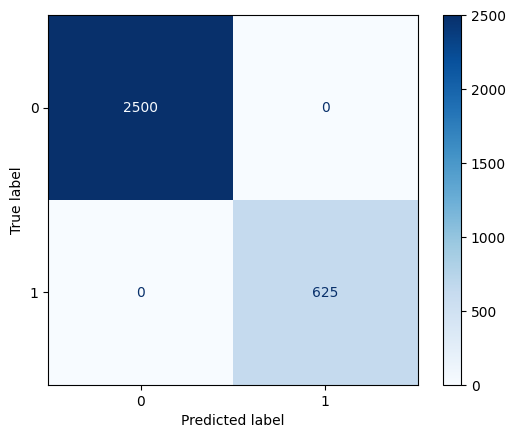

In [60]:
# Random Forest model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [61]:
#print accuracy score for random forest model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for random forest model
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 100.00%
Precision: 100.00%


In [62]:
#cross valaidation for Random Forest model
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

In [63]:
from sklearn.model_selection import cross_validate

# metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross validation 
results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 1.0
 F1-score: 1.0
Precision: 1.0
Accuracy: 1.0


In [64]:
# feature importances for Random Forest model
feature_importances= best_rf_model.feature_importances_
importance_df=pd.DataFrame({'feature':list(X_train.columns),'importance':feature_importances})
importance_df.sort_values(by='importance', ascending=False)

feature  importance
23                CRP    0.167528
2          Hemoglobin    0.120373
20                ESR    0.100346
1           RBC_Count    0.097977
17                ANA    0.070901
..                ...         ...
51         Anti_BP180    0.000000
50                DGP    0.000000
49           Anti_tTG    0.000000
48         Anti_BP230    0.000000
61  Anti_desmoglein_1    0.000000

[76 rows x 2 columns]

In [65]:
# Parameters for XGBoost
params = {
    'max_depth': [10,12],  
    'learning_rate': [0.05],  
    'n_estimators': [100],  
    'subsample': [0.8],  
    'colsample_bytree': [1.0,1.2], 
    'min_child_weight': [1],  
    'gamma': [0.1]
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])

# XGBoost model initialization
xgb_model = XGBClassifier(reg_lambda=1, reg_alpha=1)

#using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=100, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_xgb_model=random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

Best parameters:
{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}



Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00       625

    accuracy                           1.00      3125
   macro avg       1.00      1.00      1.00      3125
weighted avg       1.00      1.00      1.00      3125



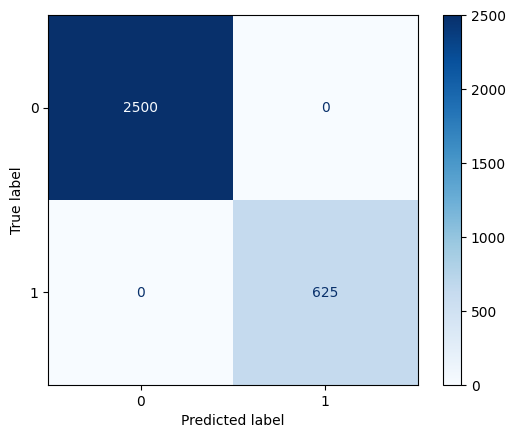

In [66]:
# XGBoost model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [67]:
#print accuracy score for XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for XGBoost model
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 100.00%
Precision: 100.00%


In [68]:
from sklearn.model_selection import cross_validate

# metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross validation 
results = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())


Recall: 1.0
 F1-score: 1.0
Precision: 1.0
Accuracy: 1.0


In [69]:
# print the average score and standard deviation
print("Average score: {:.4f}".format(scores.mean()))
print("Standard deviation: {:.4f}".format(scores.std()))

Average score: 1.0000
Standard deviation: 0.0000


In [70]:
# feature importances for XGBoost model
feature_importances= best_xgb_model.feature_importances_
importance_df=pd.DataFrame({'feature':list(X_train.columns),'importance':feature_importances})
importance_df.sort_values(by='importance', ascending=False)

feature  importance
23                         CRP    0.907731
17                         ANA    0.043029
39      General unwell feeling    0.008736
37   Brittle hair or hair loss    0.007936
2                   Hemoglobin    0.007478
..                         ...         ...
36     Stiffness in the joints    0.000000
40                  Joint pain    0.000000
41                  Anti_dsDNA    0.000000
42  Anti_enterocyte_antibodies    0.000000
75                    Gender_1    0.000000

[76 rows x 2 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

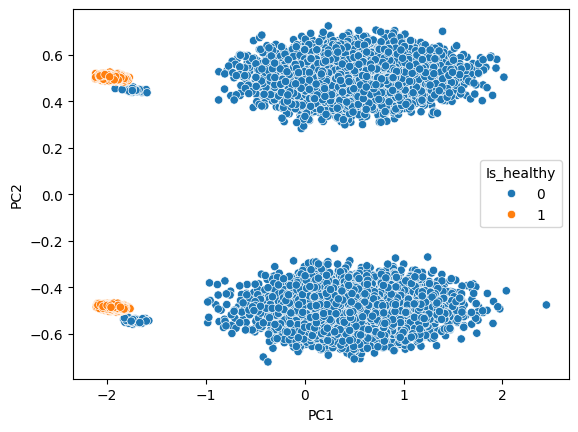

In [ ]:
# checking whether classes are perfectly separable.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Is_healthy'] = y
sns.scatterplot(x='PC1', y='PC2', hue='Is_healthy', data=X_pca_df)


Preparation of models for all disease groups (only sick patients)

Skin and Mucosal Diseases-7

Musculoskeletal Diseases-4

Thyroid and Endocrine Diseases-8

Neurological Diseases-5

Immune System Diseases-1

Miscellaneous-3

Vascular Diseases-9

Kidney and Urinary Diseases-2

Gastrointestinal and Liver Diseases-0


In [120]:
# model for Diseases groups (removing all healthy patients)
df_sick=df_scaled.copy()
df_sick = df_sick[df_sick['Is_healthy'] != 1]

In [121]:
df_sick.shape

(10000, 79)

In [171]:
X = df_sick.drop(columns=['Diseases_group','Is_healthy'])
y = df_sick['Diseases_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# using SMOTE to balance classes
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#scaling continuous_columns after split (use when data is not scaled before splitting into training and test sets)
#scaler_standard = StandardScaler()
#X_train[continuous_columns] = scaler_standard.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler_standard.transform(X_test[continuous_columns])


# Class size
print("Class balance")
print(y_train.value_counts())

Class balance
Diseases_group
5    1655
7    1237
9     999
8     916
3     878
4     564
1     508
2     379
0     364
Name: count, dtype: int64


In [172]:
#Random Forest model initialization
rf_model_sick = RandomForestClassifier(random_state=42)

# GridSearchCV parameters
#params = {
#    'criterion': ['gini', 'entropy', 'log_loss'],
#   'max_depth': [None, 2, 4, 6, 8, 10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Best paramerts for model
params = {
    'criterion': ['log_loss'],
    'max_depth': [12],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

In [174]:
#using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model_sick, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Using GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
#grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_rf_sick_model=random_search.best_estimator_
y_pred = best_rf_sick_model.predict(X_test)

Best parameters:
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}



Classification report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       121
           1       1.00      0.41      0.58       169
           2       0.00      0.00      0.00       127
           3       0.00      0.00      0.00       293
           4       1.00      0.30      0.47       188
           5       0.27      1.00      0.43       551
           7       1.00      0.62      0.77       412
           8       0.00      0.00      0.00       306
           9       0.00      0.00      0.00       333

    accuracy                           0.41      2500
   macro avg       0.47      0.35      0.35      2500
weighted avg       0.42      0.41      0.34      2500



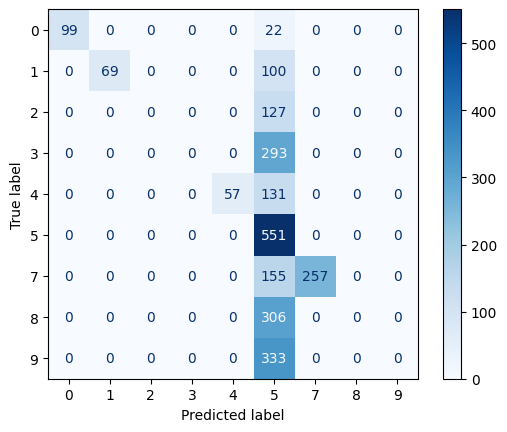

In [176]:
# Random Forest model results for all Diseases groups
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [177]:
#print accuracy score for random forest model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for random forest model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 41.32%
Precision: 47.48%


In [178]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Ddefine own scorers
precision_scorer = make_scorer(precision_score, zero_division=0,average='macro')
recall_scorer = make_scorer(recall_score, zero_division=0,average='macro')
f1_scorer = make_scorer(f1_score, zero_division=0,average='macro')

# metriks for validation
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

# Cross validation
results = cross_validate(rf_model_sick, X_train, y_train, cv=cv, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 0.33402807077989377
 F1-score: 0.35253968623378756
Precision: 0.5199219277787714
Accuracy: 0.38039999999999996


In [128]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [168]:
from sklearn.preprocessing import LabelEncoder
X = df_sick.drop(columns=['Diseases_group','Is_healthy'])
y = df_sick['Diseases_group']


# Parameters for XGBoost
params = {
    'max_depth': [10],  
    'learning_rate': [0.05],  
    'n_estimators': [100],  
    'subsample': [0.8],  
    'colsample_bytree': [1.0,1.2], 
    'min_child_weight': [1],  
    'gamma': [0.1]
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Label Encoding for target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

largest_class_weight_coef = max(df_sick['Diseases_group'].value_counts().values)/df.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

#And then use it like this
#xg = XGBClassifier(n_estimators=1000, weights = weight, max_depth=20) reg_lambda=1, reg_alpha=1,weights=weight


# XGBoost model initialization
xgb_model_sick = XGBClassifier(reg_lambda=1, reg_alpha=1)

#using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model_sick, param_distributions=params, n_iter=100, scoring='recall', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters for model
print("Best parameters:")
print(random_search.best_params_)

# Prediction for test set 
best_xgb_model_sick=random_search.best_estimator_
y_pred = best_xgb_model_sick.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best parameters:
{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}



Classification report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       121
           1       0.99      0.41      0.58       169
           2       0.00      0.00      0.00       127
           3       0.19      0.05      0.09       293
           4       0.98      0.30      0.46       188
           5       0.28      0.87      0.42       551
           6       1.00      0.62      0.77       412
           7       0.19      0.04      0.07       306
           8       0.18      0.07      0.10       333

    accuracy                           0.40      2500
   macro avg       0.53      0.35      0.38      2500
weighted avg       0.48      0.40      0.37      2500



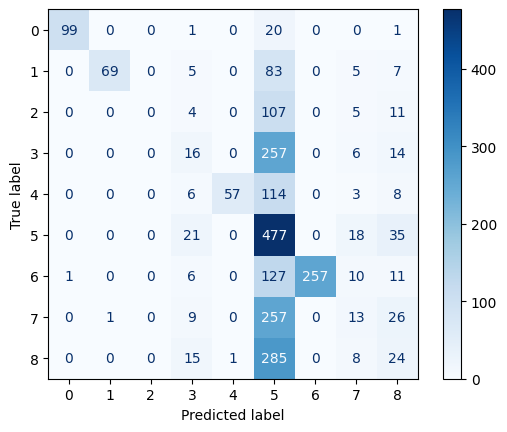

In [164]:
# XGBoost model results
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [180]:
#print accuracy score for XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print precision score for XGBoost model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))


Accuracy: 41.32%
Precision: 47.48%


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#define own scorers
precision_scorer = make_scorer(precision_score, zero_division=0,average='macro')
recall_scorer = make_scorer(recall_score, zero_division=0,average='macro')
f1_scorer = make_scorer(f1_score, zero_division=0,average='macro')

# metrics for validation 
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

# Cross validation
results = cross_validate(xgb_model_sick, X_train, y_train, cv=cv, scoring=scoring)

# Print results (from the most important to the least important)
print("Recall:", results['test_recall'].mean())
print(" F1-score:", results['test_f1'].mean())
print("Precision:", results['test_precision'].mean())
print("Accuracy:", results['test_accuracy'].mean())

Recall: 0.33140345894785905
 F1-score: 0.3575373637928005
Precision: 0.4564504581511092
Accuracy: 0.35133333333333333


Preparation of models for all disease groups (only sick patients)

Skin and Mucosal Diseases-7

Musculoskeletal Diseases-4

Thyroid and Endocrine Diseases-8

Neurological Diseases-5

Immune System Diseases-1

Miscellaneous-3

Vascular Diseases-9

Kidney and Urinary Diseases-2

Gastrointestinal and Liver Diseases-0


In [187]:
#creating a function to split df_sick to separate df for each diseases group

def create_disease_group_dfs(df_sick_00):
    """
    Function to create 9 separate DataFrames (df_sick_0, df_sick_1, ..., df_sick_9),
    excluding the 'Diseases_group' == 6 (dedicated for healthy patients), and encode the 'Diseases_group' column.
    
    The 'Diseases_group' will be coded as:
    - 1 if the value matches the specific group.
    - 0 otherwise.
    """
    # Loop over the disease groups 0-9 (excluding 6)
    for i in range(10):
        if i == 6:
            continue  # Skip Diseases_group == 6
        
        # Create a new DataFrame for the current group
        df_group = df_sick_00[df_sick_00['Diseases_group'] == i].copy()
        
        # Encode the 'Diseases_group' column: 1 for the specific group, 0 otherwise
        df_group['Diseases_group'] = np.where(df_group['Diseases_group'] == i, 1, 0)
        
        # Dynamically create a variable with the name df_sick_<i>
        globals()[f"df_sick_{i}"] = df_group





In [191]:
df_sick_00=df_sick.copy()

create_disease_group_dfs(df_sick_00)

In [217]:
# creating a fucntion to bulid multiple models based on Random Forest algoritm 

def train_evaluate_random_forest(df, target_column, exclude_columns=None, model_name="my_model_name"):
    """
    Function to train and evaluate a Random Forest classifier with randomized hyperparameter search.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the column to be predicted.
    - exclude_columns: A list of columns to exclude from the features (optional).
    - model_name: A name to uniquely identify the model (optional, default is "Random_Forest_Model").
    
    The function prints out:
    - The class balance.
    - Best hyperparameters for the Random Forest model.
    - The classification report, accuracy, precision, recall, and F1 scores.
    """
    # Prepare features and target
    if exclude_columns is None:
        exclude_columns = []
    X = df.drop(columns=[target_column] + exclude_columns)
    y = df[target_column]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Class size
    print(f"Class balance for model '{model_name}':")
    print(y_train.value_counts())

    # Random Forest model initialization
    
    rf_model = RandomForestClassifier(random_state=42)
   

    # Hyperparameters for RandomizedSearchCV
    params = {
        'criterion': ['log_loss'],
        'max_depth': [12],
        'min_samples_split': [10],
        'min_samples_leaf': [2]
    }

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    # Best parameters for the model
    print(f"\nBest parameters for model '{model_name}':")
    print(random_search.best_params_)

    # Prediction for the test set
    best_rf_model = random_search.best_estimator_
    y_pred = best_rf_model.predict(X_test)

    # Classification report
    print(f"\nClassification report for model '{model_name}':")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for model '{model_name}': {accuracy * 100:.2f}%")

    # Precision score
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision for model '{model_name}': {precision* 100:.2f}%")

    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Define custom scorers
    precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')
    recall_scorer = make_scorer(recall_score, zero_division=0, average='macro')
    f1_scorer = make_scorer(f1_score, zero_division=0, average='macro')

    # Scoring metrics for validation
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1': f1_scorer
    }

    # Cross-validation results
    results = cross_validate(rf_model, X_train, y_train, cv=cv, scoring=scoring)

    # Print results (from the most important to the least important)
    print(f"Recall for model (train data) '{model_name}':", results['test_recall'].mean())
    print(f"F1-score for model (train data)'{model_name}':", results['test_f1'].mean())
    print(f"Precision for model (train data)'{model_name}':", results['test_precision'].mean())
    print(f"Accuracy for model (train data)'{model_name}':", results['test_accuracy'].mean())

Preaparing results for each model for diseases group based on created function

Class balance for model 'model_gastrointestinal_and_liver':
Diseases_group
0    7136
1     364
Name: count, dtype: int64

Best parameters for model 'model_gastrointestinal_and_liver':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_gastrointestinal_and_liver':
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2379
           1       1.00      0.90      0.95       121

    accuracy                           1.00      2500
   macro avg       1.00      0.95      0.97      2500
weighted avg       1.00      1.00      1.00      2500

Accuracy for model 'model_gastrointestinal_and_liver': 99.52%
Precision for model 'model_gastrointestinal_and_liver': 99.75%
Recall for model (train data) 'model_gastrointestinal_and_liver': 0.9105855855855858
F1-score for model (train data)'model_gastrointestinal_and_liver': 0.9479699884744003
Precision for model (train data)'

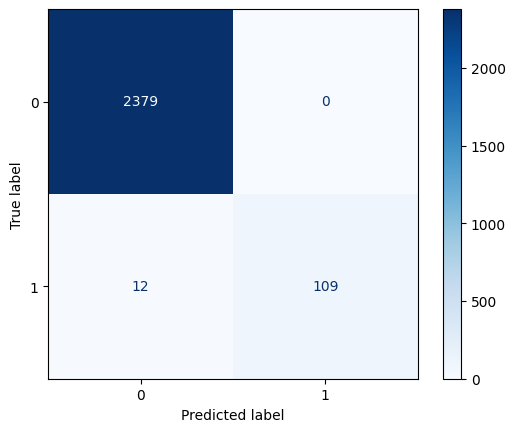

In [218]:
train_evaluate_random_forest(df_sick_0, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_gastrointestinal_and_liver')

Class balance for model 'model_immune_system':
Diseases_group
0    6992
1     508
Name: count, dtype: int64

Best parameters for model 'model_immune_system':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_immune_system':
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2331
           1       1.00      0.38      0.56       169

    accuracy                           0.96      2500
   macro avg       0.98      0.69      0.77      2500
weighted avg       0.96      0.96      0.95      2500

Accuracy for model 'model_immune_system': 95.84%
Precision for model 'model_immune_system': 97.86%
Recall for model (train data) 'model_immune_system': 0.694921568627451
F1-score for model (train data)'model_immune_system': 0.7671569654487502
Precision for model (train data)'model_immune_system': 0.9787882934185239
Accuracy for model (train data)'model_immune_system

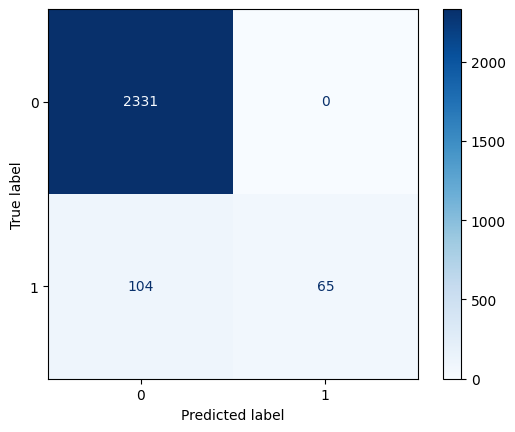

In [219]:
train_evaluate_random_forest(df_sick_1, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_immune_system')

Class balance for model 'model_kidney_and_urinary':
Diseases_group
0    7120
1     380
Name: count, dtype: int64

Best parameters for model 'model_kidney_and_urinary':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_kidney_and_urinary':
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2374
           1       0.00      0.00      0.00       126

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.93      2500

Accuracy for model 'model_kidney_and_urinary': 94.96%
Precision for model 'model_kidney_and_urinary': 47.48%
Recall for model (train data) 'model_kidney_and_urinary': 0.5
F1-score for model (train data)'model_kidney_and_urinary': 0.48700410396716826
Precision for model (train data)'model_kidney_and_urinary': 0.4746666666666667
Accuracy for model (trai

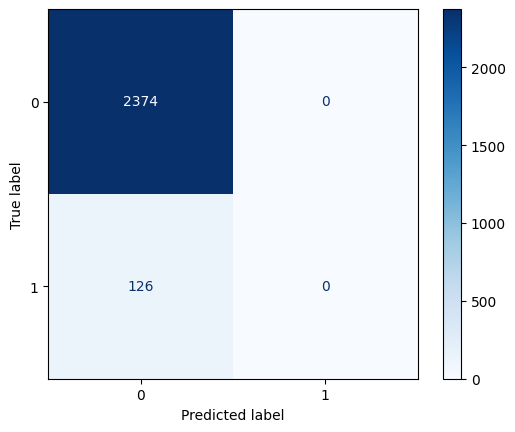

In [208]:
train_evaluate_random_forest(df_sick_2, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_kidney_and_urinary')

Class balance for model 'model_miscellaneous':
Diseases_group
0    6622
1     878
Name: count, dtype: int64

Best parameters for model 'model_miscellaneous':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_miscellaneous':
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2207
           1       0.00      0.00      0.00       293

    accuracy                           0.88      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.78      0.88      0.83      2500

Accuracy for model 'model_miscellaneous': 88.28%
Precision for model 'model_miscellaneous': 44.14%
Recall for model (train data) 'model_miscellaneous': 0.5
F1-score for model (train data)'model_miscellaneous': 0.4689137090032058
Precision for model (train data)'model_miscellaneous': 0.44146666666666673
Accuracy for model (train data)'model_miscellaneous': 0.88293333

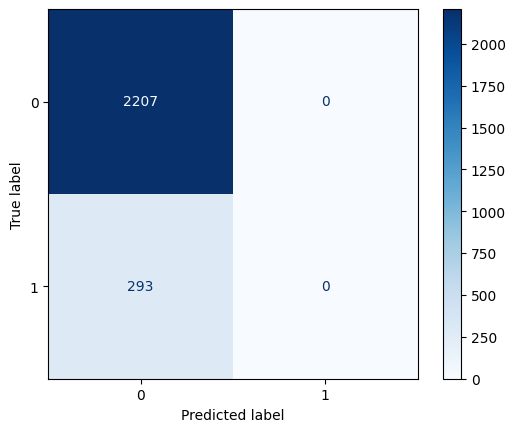

In [209]:
train_evaluate_random_forest(df_sick_3, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_miscellaneous')

Class balance for model 'model_musculoskeletal':
Diseases_group
0    6936
1     564
Name: count, dtype: int64

Best parameters for model 'model_musculoskeletal':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_musculoskeletal':
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2312
           1       1.00      0.22      0.36       188

    accuracy                           0.94      2500
   macro avg       0.97      0.61      0.66      2500
weighted avg       0.94      0.94      0.92      2500

Accuracy for model 'model_musculoskeletal': 94.12%
Precision for model 'model_musculoskeletal': 97.01%
Recall for model (train data) 'model_musculoskeletal': 0.6260494987468672
F1-score for model (train data)'model_musculoskeletal': 0.6850277289531793
Precision for model (train data)'model_musculoskeletal': 0.9713328012761846
Accuracy for model (train data)'mo

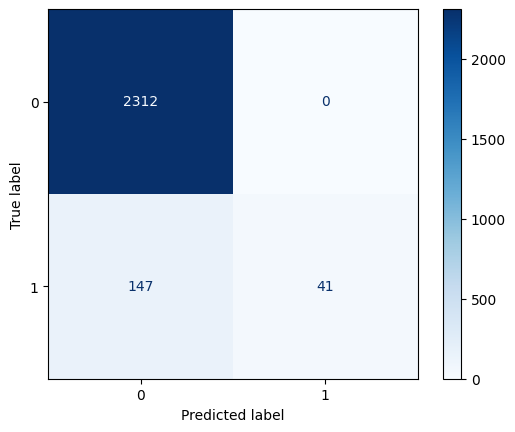

In [210]:
train_evaluate_random_forest(df_sick_4, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_musculoskeletal')

Class balance for model 'model_neurological':
Diseases_group
0    5845
1    1655
Name: count, dtype: int64

Best parameters for model 'model_neurological':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_neurological':
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1949
           1       0.00      0.00      0.00       551

    accuracy                           0.78      2500
   macro avg       0.39      0.50      0.44      2500
weighted avg       0.61      0.78      0.68      2500

Accuracy for model 'model_neurological': 77.96%
Precision for model 'model_neurological': 38.98%
Recall for model (train data) 'model_neurological': 0.4997432970378176
F1-score for model (train data)'model_neurological': 0.4378652106215072
Precision for model (train data)'model_neurological': 0.38962242990654206
Accuracy for model (train data)'model_neurological': 0.77

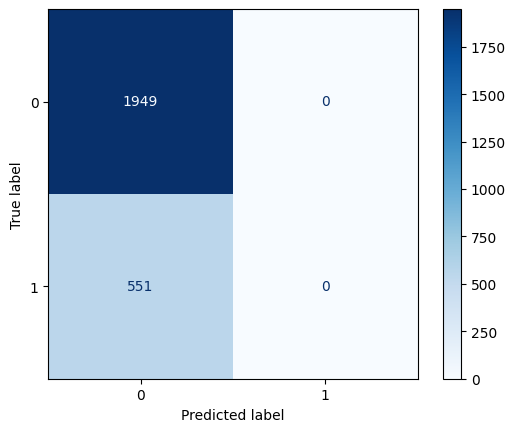

In [211]:
train_evaluate_random_forest(df_sick_5, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_neurological')

Class balance for model 'model_skin_and_mucosal':
Diseases_group
0    6263
1    1237
Name: count, dtype: int64

Best parameters for model 'model_skin_and_mucosal':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_skin_and_mucosal':
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2088
           1       1.00      0.56      0.72       412

    accuracy                           0.93      2500
   macro avg       0.96      0.78      0.84      2500
weighted avg       0.93      0.93      0.92      2500

Accuracy for model 'model_skin_and_mucosal': 92.72%
Precision for model 'model_skin_and_mucosal': 95.99%
Recall for model (train data) 'model_skin_and_mucosal': 0.7853363493312353
F1-score for model (train data)'model_skin_and_mucosal': 0.8425435381432582
Precision for model (train data)'model_skin_and_mucosal': 0.9609491305487508
Accuracy for model (train 

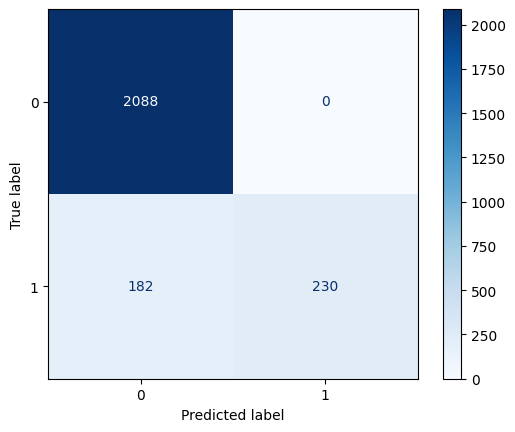

In [212]:
train_evaluate_random_forest(df_sick_7, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_skin_and_mucosal')

Class balance for model 'model_thyroidand_endocrine':
Diseases_group
0    6583
1     917
Name: count, dtype: int64

Best parameters for model 'model_thyroidand_endocrine':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_thyroidand_endocrine':
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2195
           1       0.00      0.00      0.00       305

    accuracy                           0.88      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.77      0.88      0.82      2500

Accuracy for model 'model_thyroidand_endocrine': 87.80%
Precision for model 'model_thyroidand_endocrine': 43.90%
Recall for model (train data) 'model_thyroidand_endocrine': 0.5
F1-score for model (train data)'model_thyroidand_endocrine': 0.46744296002967944
Precision for model (train data)'model_thyroidand_endocrine': 0.4388666666666666
Accuracy

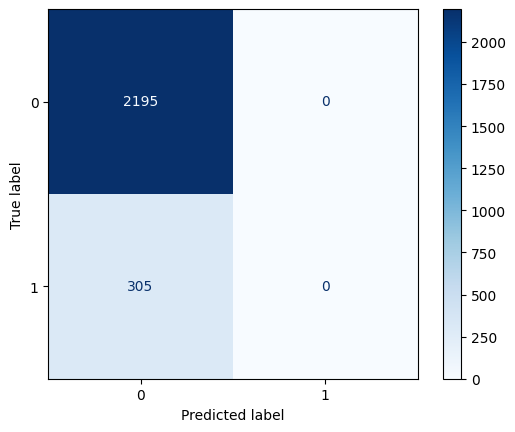

In [213]:
train_evaluate_random_forest(df_sick_8, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_thyroidand_endocrine')

Class balance for model 'model_vascular':
Diseases_group
0    6501
1     999
Name: count, dtype: int64

Best parameters for model 'model_vascular':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_vascular':
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2167
           1       0.00      0.00      0.00       333

    accuracy                           0.87      2500
   macro avg       0.43      0.50      0.46      2500
weighted avg       0.75      0.87      0.80      2500

Accuracy for model 'model_vascular': 86.68%
Precision for model 'model_vascular': 43.34%
Recall for model (train data) 'model_vascular': 0.5
F1-score for model (train data)'model_vascular': 0.4643239522789845
Precision for model (train data)'model_vascular': 0.43340000000000006
Accuracy for model (train data)'model_vascular': 0.8668000000000001


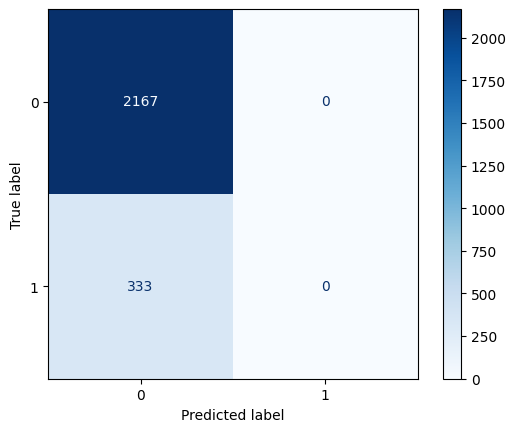

In [214]:
train_evaluate_random_forest(df_sick_9, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_vascular')

In [221]:
from imblearn.under_sampling import RandomUnderSampler

In [222]:
# creating a fucntion to bulid multiple models based on Random Forest algoritm 

def train_evaluate_random_forest(df, target_column, exclude_columns=None, model_name="my_model_name"):
    """
    Function to train and evaluate a Random Forest classifier with randomized hyperparameter search.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the column to be predicted.
    - exclude_columns: A list of columns to exclude from the features (optional).
    - model_name: A name to uniquely identify the model (optional, default is "Random_Forest_Model").
    
    The function prints out:
    - The class balance.
    - Best hyperparameters for the Random Forest model.
    - The classification report, accuracy, precision, recall, and F1 scores.
    """
    # Prepare features and target
    if exclude_columns is None:
        exclude_columns = []
    X = df.drop(columns=[target_column] + exclude_columns)
    y = df[target_column]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    #RandomUnderSampler
    rus=RandomUnderSampler(random_state=101)
    X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

    # Class size
    print(f"Class balance for model '{model_name}':")
    print(y_train_rus.value_counts())

    # Random Forest model initialization
    
    rf_model = RandomForestClassifier(random_state=42)
   

    # Hyperparameters for RandomizedSearchCV
    params = {
        'criterion': ['log_loss'],
        'max_depth': [12],
        'min_samples_split': [10],
        'min_samples_leaf': [2]
    }

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, scoring='recall', cv=5, random_state=42)
    random_search.fit(X_train_rus, y_train_rus)

    # Best parameters for the model
    print(f"\nBest parameters for model '{model_name}':")
    print(random_search.best_params_)

    # Prediction for the test set
    best_rf_model = random_search.best_estimator_
    y_pred = best_rf_model.predict(X_test)

    # Classification report
    print(f"\nClassification report for model '{model_name}':")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for model '{model_name}': {accuracy * 100:.2f}%")

    # Precision score
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision for model '{model_name}': {precision* 100:.2f}%")

    # StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Define custom scorers
    precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')
    recall_scorer = make_scorer(recall_score, zero_division=0, average='macro')
    f1_scorer = make_scorer(f1_score, zero_division=0, average='macro')

    # Scoring metrics for validation
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1': f1_scorer
    }

    # Cross-validation results
    results = cross_validate(rf_model, X_train_rus, y_train_rus, cv=cv, scoring=scoring)

    # Print results (from the most important to the least important)
    print(f"Recall for model (train data) '{model_name}':", results['test_recall'].mean())
    print(f"F1-score for model (train data)'{model_name}':", results['test_f1'].mean())
    print(f"Precision for model (train data)'{model_name}':", results['test_precision'].mean())
    print(f"Accuracy for model (train data)'{model_name}':", results['test_accuracy'].mean())

Class balance for model 'model_gastrointestinal_and_liver':
Diseases_group
0    364
1    364
Name: count, dtype: int64

Best parameters for model 'model_gastrointestinal_and_liver':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_gastrointestinal_and_liver':
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2379
           1       1.00      0.90      0.95       121

    accuracy                           1.00      2500
   macro avg       1.00      0.95      0.97      2500
weighted avg       1.00      1.00      1.00      2500

Accuracy for model 'model_gastrointestinal_and_liver': 99.52%
Precision for model 'model_gastrointestinal_and_liver': 99.75%
Recall for model (train data) 'model_gastrointestinal_and_liver': 0.9118993993993995
F1-score for model (train data)'model_gastrointestinal_and_liver': 0.9107811856979696
Precision for model (train data)'mo

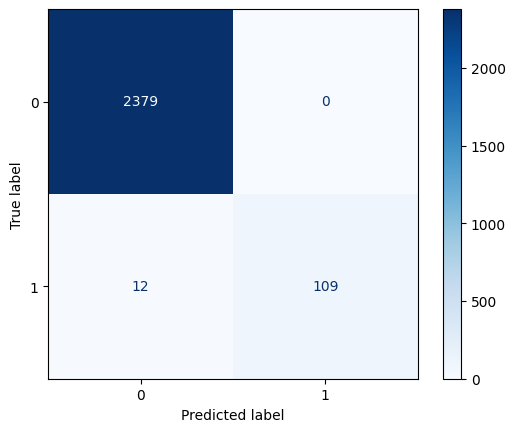

In [223]:
train_evaluate_random_forest(df_sick_0, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_gastrointestinal_and_liver')


Class balance for model 'model_immune_system':
Diseases_group
0    508
1    508
Name: count, dtype: int64

Best parameters for model 'model_immune_system':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_immune_system':
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2331
           1       0.21      0.47      0.29       169

    accuracy                           0.84      2500
   macro avg       0.58      0.67      0.60      2500
weighted avg       0.91      0.84      0.87      2500

Accuracy for model 'model_immune_system': 84.16%
Precision for model 'model_immune_system': 58.13%
Recall for model (train data) 'model_immune_system': 0.6849999999999999
F1-score for model (train data)'model_immune_system': 0.6774583685597838
Precision for model (train data)'model_immune_system': 0.7049827263630694
Accuracy for model (train data)'model_immune_system'

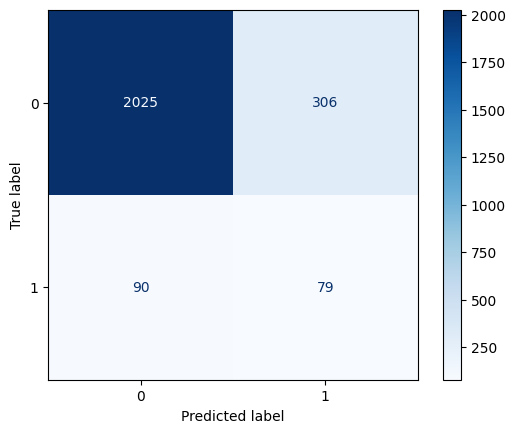

In [224]:
train_evaluate_random_forest(df_sick_1, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_immune_system')


Class balance for model 'model_kidney_and_urinary':
Diseases_group
0    380
1    380
Name: count, dtype: int64

Best parameters for model 'model_kidney_and_urinary':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_kidney_and_urinary':
              precision    recall  f1-score   support

           0       0.95      0.45      0.61      2374
           1       0.05      0.56      0.09       126

    accuracy                           0.46      2500
   macro avg       0.50      0.50      0.35      2500
weighted avg       0.91      0.46      0.59      2500

Accuracy for model 'model_kidney_and_urinary': 45.92%
Precision for model 'model_kidney_and_urinary': 50.09%
Recall for model (train data) 'model_kidney_and_urinary': 0.5078947368421053
F1-score for model (train data)'model_kidney_and_urinary': 0.5062489587541498
Precision for model (train data)'model_kidney_and_urinary': 0.5082251679692179
Accuracy for

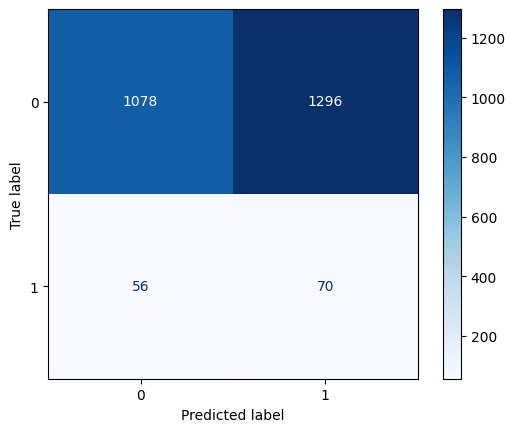

In [225]:
train_evaluate_random_forest(df_sick_2, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_kidney_and_urinary')


Class balance for model 'model_miscellaneous':
Diseases_group
0    878
1    878
Name: count, dtype: int64

Best parameters for model 'model_miscellaneous':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_miscellaneous':
              precision    recall  f1-score   support

           0       0.92      0.39      0.55      2207
           1       0.14      0.75      0.24       293

    accuracy                           0.43      2500
   macro avg       0.53      0.57      0.39      2500
weighted avg       0.83      0.43      0.51      2500

Accuracy for model 'model_miscellaneous': 43.16%
Precision for model 'model_miscellaneous': 53.03%
Recall for model (train data) 'model_miscellaneous': 0.5455263845350051
F1-score for model (train data)'model_miscellaneous': 0.5438996019650797
Precision for model (train data)'model_miscellaneous': 0.5464851007650469
Accuracy for model (train data)'model_miscellaneous'

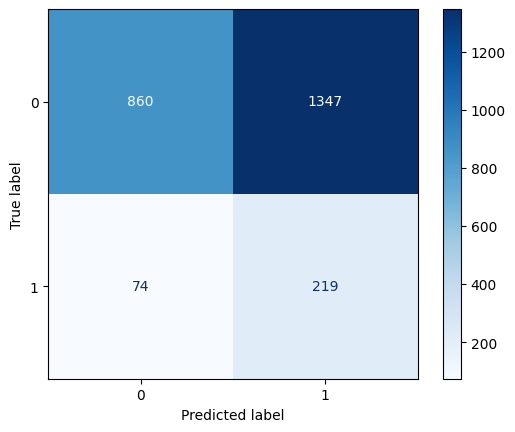

In [226]:
train_evaluate_random_forest(df_sick_3, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_miscellaneous')


Class balance for model 'model_musculoskeletal':
Diseases_group
0    564
1    564
Name: count, dtype: int64

Best parameters for model 'model_musculoskeletal':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_musculoskeletal':
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2312
           1       0.19      0.34      0.24       188

    accuracy                           0.84      2500
   macro avg       0.57      0.61      0.58      2500
weighted avg       0.89      0.84      0.86      2500

Accuracy for model 'model_musculoskeletal': 84.20%
Precision for model 'model_musculoskeletal': 56.58%
Recall for model (train data) 'model_musculoskeletal': 0.5922619047619048
F1-score for model (train data)'model_musculoskeletal': 0.5722260092779322
Precision for model (train data)'model_musculoskeletal': 0.6122339521490221
Accuracy for model (train data)'mode

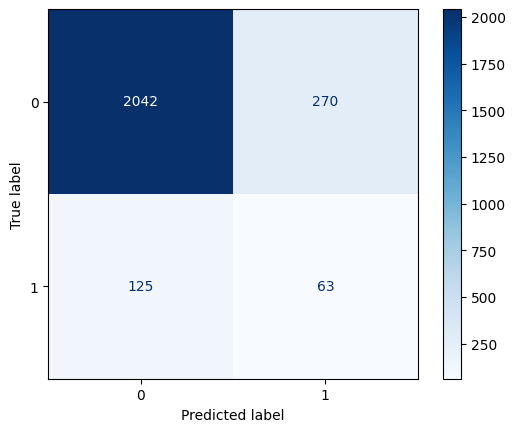

In [227]:
train_evaluate_random_forest(df_sick_4, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_musculoskeletal')


Class balance for model 'model_neurological':
Diseases_group
0    1655
1    1655
Name: count, dtype: int64

Best parameters for model 'model_neurological':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_neurological':
              precision    recall  f1-score   support

           0       1.00      0.23      0.37      1949
           1       0.27      1.00      0.42       551

    accuracy                           0.40      2500
   macro avg       0.63      0.61      0.40      2500
weighted avg       0.84      0.40      0.38      2500

Accuracy for model 'model_neurological': 39.76%
Precision for model 'model_neurological': 63.39%
Recall for model (train data) 'model_neurological': 0.5764366557137641
F1-score for model (train data)'model_neurological': 0.5679710379175759
Precision for model (train data)'model_neurological': 0.5832378629945013
Accuracy for model (train data)'model_neurological': 0.576

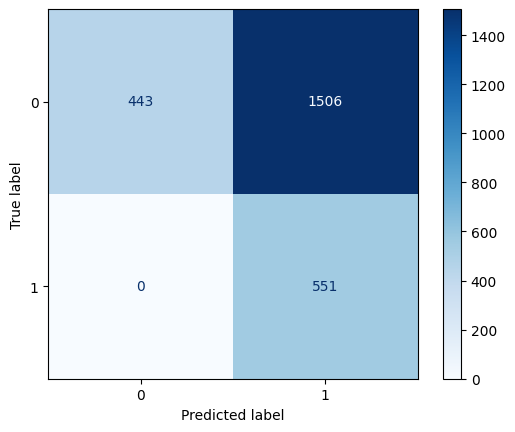

In [228]:
train_evaluate_random_forest(df_sick_5, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_neurological')


Class balance for model 'model_skin_and_mucosal':
Diseases_group
0    1237
1    1237
Name: count, dtype: int64

Best parameters for model 'model_skin_and_mucosal':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_skin_and_mucosal':
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2088
           1       1.00      0.62      0.76       412

    accuracy                           0.94      2500
   macro avg       0.96      0.81      0.86      2500
weighted avg       0.94      0.94      0.93      2500

Accuracy for model 'model_skin_and_mucosal': 93.68%
Precision for model 'model_skin_and_mucosal': 96.48%
Recall for model (train data) 'model_skin_and_mucosal': 0.7786028061893522
F1-score for model (train data)'model_skin_and_mucosal': 0.7686187725002044
Precision for model (train data)'model_skin_and_mucosal': 0.8324045378416003
Accuracy for model (train 

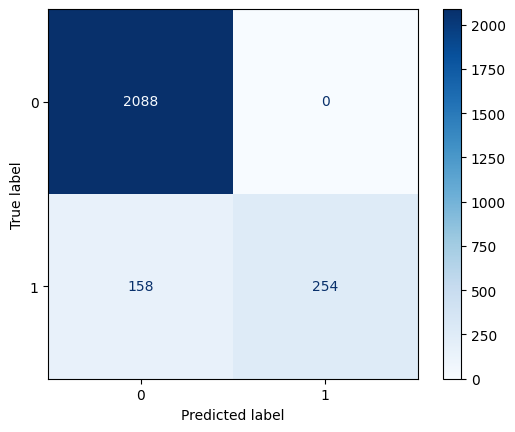

In [229]:
train_evaluate_random_forest(df_sick_7, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_skin_and_mucosal')

Class balance for model 'model_thyroidand_endocrine':
Diseases_group
0    917
1    917
Name: count, dtype: int64

Best parameters for model 'model_thyroidand_endocrine':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_thyroidand_endocrine':
              precision    recall  f1-score   support

           0       0.93      0.27      0.42      2195
           1       0.14      0.86      0.24       305

    accuracy                           0.34      2500
   macro avg       0.54      0.57      0.33      2500
weighted avg       0.84      0.34      0.40      2500

Accuracy for model 'model_thyroidand_endocrine': 34.40%
Precision for model 'model_thyroidand_endocrine': 53.78%
Recall for model (train data) 'model_thyroidand_endocrine': 0.5496416626851409
F1-score for model (train data)'model_thyroidand_endocrine': 0.5472518009725327
Precision for model (train data)'model_thyroidand_endocrine': 0.5507967580485

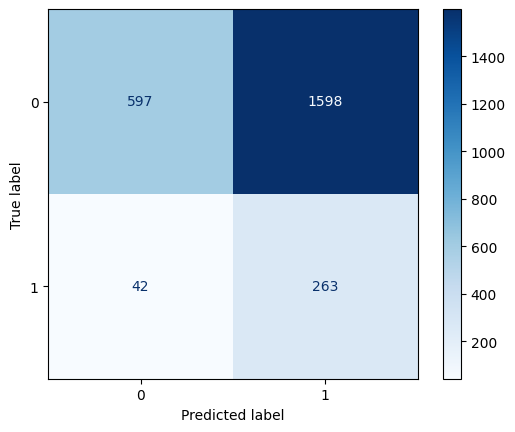

In [230]:
train_evaluate_random_forest(df_sick_8, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_thyroidand_endocrine')


Class balance for model 'model_vascular':
Diseases_group
0    999
1    999
Name: count, dtype: int64

Best parameters for model 'model_vascular':
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'log_loss'}

Classification report for model 'model_vascular':
              precision    recall  f1-score   support

           0       0.94      0.32      0.48      2167
           1       0.16      0.86      0.27       333

    accuracy                           0.39      2500
   macro avg       0.55      0.59      0.38      2500
weighted avg       0.83      0.39      0.45      2500

Accuracy for model 'model_vascular': 39.40%
Precision for model 'model_vascular': 54.93%
Recall for model (train data) 'model_vascular': 0.555070707070707
F1-score for model (train data)'model_vascular': 0.5525906040115149
Precision for model (train data)'model_vascular': 0.5564209715920247
Accuracy for model (train data)'model_vascular': 0.5550452261306533


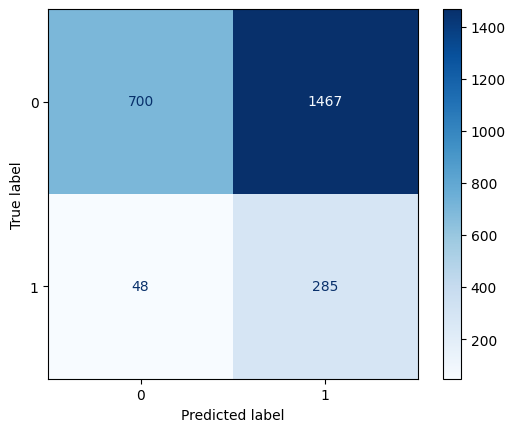

In [231]:
train_evaluate_random_forest(df_sick_9, 'Diseases_group', exclude_columns=['Is_healthy'],model_name='model_vascular')